# Projeto - Previsão de receitas na bilheteira
__Realizado por:__ Ana Filipa Nogueira (201705948) e Ana Rita Diogo (201707122)

_Aprendizagem Computacional_ - _Mestrado em Engenharia Física_ - _2021/2022_

### Table of Contents

* [1. Import e Visualização dos dados](#chapter1)
* [2. Processamento de dados:](#chapter2)
    
    * [2.1 Cast](#section_2_1)
    * [2.2 Runtime](#section_2_2)
    * [2.3 Production Countries](#section_2_3)
    * [2.4 Original Language](#section_2_4)
    * [2.5 Budget](#section_2_5)
    * [2.6 Belongs to collection](#section_2_6)
    * [2.7 Crew](#section_2_7)
    * [2.8 Homepage](#section_2_8)
    * [2.9 Popularity](#section_2_9)
    * [2.10 Genres](#section_2_10)
    * [2.11 Spoken Language](#section_2_11)
    * [2.12 Release Date](#section_2_12)
    * [2.13 Production Companies](#section_2_13)
    * [2.14 IMDB id](#section_2_14)
    * [2.15 Original Title](#section_2_15)
    * [2.16 Overview](#section_2_16)
    * [2.17 Poster Path](#section_2_17)
    * [2.18 Status](#section_2_18)
    * [2.19 Tagline](#section_2_19)
    * [2.20 Title](#section_2_20)
    * [2.21 Keywords](#section_2_21)

* [3. Tabelas dos dados de treino e de teste normalizados](#chapter3)
* [4. Dados para entrada dos modelos](#chapter4)
* [5. Modelos](#chapter5)
    
    
    
    

## __1. Import e Visualização dos dados__ <a class="anchor" id="chapter1"></a>

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
from ast import literal_eval
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/tmdb-box-office-prediction/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


__Ler os dados de treino e teste__

In [3]:
path = "./tmdb-box-office-prediction/"

dados_treino = pd.read_csv(path + 'train.csv', index_col='id') #definiu-se id como a coluna de indexação
dados_teste = pd.read_csv(path + 'test.csv', index_col='id')   #definiu-se id como a coluna de indexação
dados_treino.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [5]:
dados_treino.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


__Visualização da distribuição dos dados pelas classes:__

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

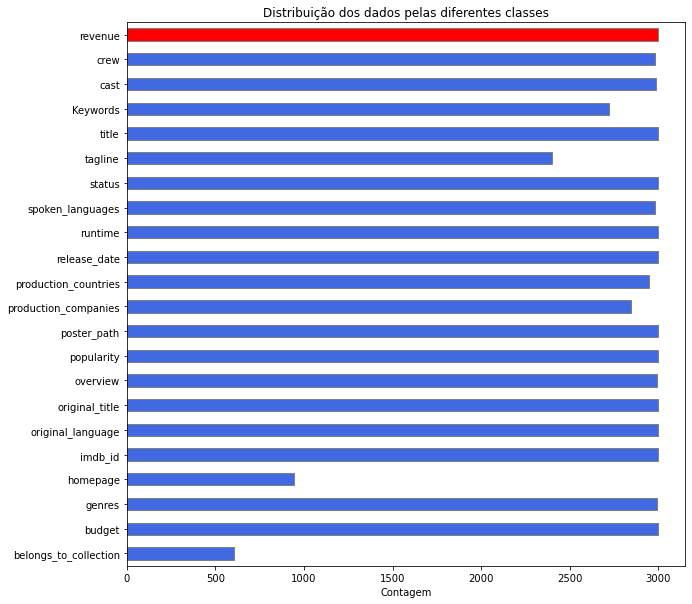

In [6]:
contagem = dados_treino.notnull().sum()
cores = ['royalblue']*21
cores.append('red')

plt.figure(figsize=(10,10))
ax = contagem.plot.barh(color = cores, edgecolor='gray')
plt.title('Distribuição dos dados pelas diferentes classes')
plt.xlabel('Contagem')
for container in ax.containers:
    ax.bar_label(container) #em colab nao funciona mas em jupyter sim (aparecendo a contagem de elementos no fim de cada linha)
plt.show()

Observando a distribuição dos dados pelas classes é possível constatar que as seguintes classes: 
- estão presentes em __todos os exemplos__: Revenue, Title, Status, Release Date, Popularity, Original title, Original language, imdb id, Budget.

- estão presentes em __pelo menos 90% exemplos, embora não em todos__: Crew, Cast, Keywords, Spoken languages, Runtime, Production countries, Production companies, Poster path, Overview, Genres.

- têm menor representitividade: Tagline, que existe em __cerca de 80% dos exemplos__, e com uma __representatividade abaixo dos 32%__: Homepage, Belongs to collection.

Portanto, é possível inferir que as classes Homepage e Belongs to collection como não estão presentes na grande maioria dos exemplos, a melhor maneira de analisar estas variáveis será fazer uma análise binária de possuí ou não possuí esta variável e ver se o facto de apresentar esta variável tem influência no revenue. 

A classe Tagline embora se encontre nas classes com menor representatividade, esta está presente em cerca de 80% dos casos, que é uma percentagem bastante elevada, por isso esta classe não deve ser deixada de fora e deve ser vista a sua influência nas previsões. 

Todas as outras têm uma grande representividade portanto, todas elas devem ser ser processadas para se poder ter em consideração o máximo de parâmetros possíveis para a entrada dos modelos e ver a influência delas na previsão final.

Não esquecer que a classe que se tem como __objetivo__ de prever é __Revenue__.

De seguida, ir-se-á fazer um estudo da influência das classes nas previsões para os diferentes modelos.

## __2. Processamento de dados:__ <a class="anchor" id="chapter2"></a>

O próximo passo a realizar é analisar a correlanção entre a revenue e as diferentes variáveis disponíveis, de forma a descartar as que não afetam a revenue.

### Funções auxiliares

Função para a separação dos dados dentro de cada coluna de dados dos dados de treino:

In [7]:
'''
ENTRADAS:
x: dataframe que se pretende converter em string
obj: coluna do dataframe que se pretende converter os valores em string

SAÍDAS:
a: dataframe com os dados processados como string
'''

def text_to_value(x, obj):
    a = ''
    if x == 'NaN':
        return 'No tag'
    
    else:
        b = len(literal_eval(x))
        
        if b == 1:
            valor = literal_eval(x)[0].get(obj)

            if type(valor) != str:
                valor = str(valor)
                a = a + valor
            else:
                a = a + valor
        else:
            for i in range(0,b):
                
                if i == 0:
                    valor_b = literal_eval(x)[i].get(obj)
                    
                    if type(valor_b) != str:
                        valor_b = str(valor_b)
                        a = a + valor_b
                    else:
                        a = a + valor_b
                else:
                    valor_c = literal_eval(x)[i].get(obj)
                    
                    if type(valor_c) != str:
                        valor_c = str(valor_c)
                        a = a + ';' + valor_c
                    else:
                        a = a + ';' + valor_c
        return a


Função que permite construir um dicionario para os diferentes dados de cada coluna:

In [8]:
'''
ENTRADAS:
    dados_entrada: coluna da qual se pretende fazer um dicionário
    minimo_t: nº minimo de elementos que tem cada linha da coluna ou o nº minimo a partir do qual se pretende considerar para construir o dicionário
    number_ini: nº inicial que se pretende considerar o primeiro elemento do dicionário quando não mencionado começa em zero
    troca: caso nao se queira que a funçao avalie dentro dos elementos do array se existe entre os vários elementos, elementos que sejam iguais mas com a ordem invertida
           por exemplo, troca=0: inicial = [['US', 'CA'], ['FR', 'CA'], ['CA', 'US']]   ---->  [['US', 'CA'], ['FR', 'CA'], ['US', 'CA']]
                       troca!=0: inicial = [['US', 'CA'], ['FR', 'CA'], ['CA', 'US']]   ---->  [['US', 'CA'], ['FR', 'CA'], ['CA', 'US']]

SAÍDAS:
    dict_variavel: dicionário pretendido para a coluna dos dados_entrada
    mais_ent: retorna um array igual ao array inicial em formato de lista, e nos casos em que existe [['US', 'CA'], ['FR', 'CA'], ['CA', 'US']] 
              o array mais_ent vai retornar [['US', 'CA'], ['FR', 'CA'], ['US', 'CA']] se troca = 0.
'''

def fazer_dicionario(dados_entrada, minimo_t, number_ini=0, troca = 0):
    dict_variavel = {}
    mais_ent = dados_entrada.to_list()
    entradas_dif = []

    for item_p, array_p in enumerate(mais_ent):
        if len(array_p)>=minimo_t:
            entradas_dif.append(array_p)
            for i_p, ent_2 in enumerate(mais_ent):
                cont = 0
                if i_p>=item_p:
                    t_maisp = len(array_p)
                    
                    if array_p != ent_2 and t_maisp == len(ent_2):
                            for i in range(t_maisp):
                                for j in range(t_maisp):
                                    if array_p[i] == ent_2[j] and troca == 0:
                                        cont += 1
                                        break
                                if cont==0:
                                    break
                            if cont == t_maisp:
                                mais_ent[i_p] = array_p          
            
        for r in range(len(entradas_dif)-1):
            if entradas_dif[-1] == entradas_dif[r]:
                entradas_dif.pop()
                break

    for i in range(len(entradas_dif)):
        dict_variavel['{}'.format(entradas_dif[i])] = number_ini+i

    return dict_variavel, mais_ent

Função que permite normalizar os dados de uma coluna:

In [9]:
'''
ENTRADAS:
dados: coluna com os dados que se pretende normalizar
z: parâmtero que define se a normalização é feita de [0, 1] ou de [-1, 1], que depende se z=0 ou se z!=0, respetivamente

SAÍDA:
novo_array: lista com os dados de entrada normalizados
'''
def funcao_normaliza(dados, z=0):
    novo_array = []
    
    media = np.mean(dados)
    Max = np.max(dados)
    Min = np.min(dados)
    
    if type(dados) != list:
        dados = dados.to_list()
    
    if abs(Max) > abs(Min):
        s = Max
    else:
        s = Min

    for i in range(len(dados)):
        if z == 0:
            novo_array.append((dados[i])/s)
        else:
            novo_array.append((dados[i]-media)/s)
    
    return novo_array

----
----

Criação dos dataframes para colocar os dados de treino e os dados de teste normalizados

In [10]:
dados_treino_norm = pd.DataFrame()
dados_teste_norm = pd.DataFrame()

### __2.1 Cast__ <a class="anchor" id="section_2_1"></a>

Nos dados correspondentes ao cast tem-se a seguinte informação:
- cast_id
- character: personagem interpretada por certo ator
- credit id
- __gender:__ género do ator (0 - indefinido; 1 - mulher; 2 - homem)
- __id:__ nº específico atribuído aquele ator
- __name:__ Nome do ator
- __order:__ Ordem pela qual o ator aparece na lista
- profile_path: Caminho para o perfil do ator

{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}

In [11]:
cast_data = pd.concat([dados_treino['cast'], dados_treino['cast'], dados_treino['cast'], dados_treino['revenue']], axis=1, keys=['genero', 'nome', 'id_nome', 'revenue'])

cast_data['nome'] = cast_data['nome'].fillna('NaN')
cast_data['nome'] = cast_data['nome'].apply(text_to_value, obj='name')
cast_data['nome'] = cast_data['nome'].str.split(";")

cast_data['genero'] = cast_data['genero'].fillna('NaN')
cast_data['genero'] = cast_data['genero'].apply(text_to_value, obj='gender')
cast_data['genero'] = cast_data['genero'].str.split(";")

cast_data['id_nome'] = cast_data['id_nome'].fillna('NaN')
cast_data['id_nome'] = cast_data['id_nome'].apply(text_to_value, obj='id')
cast_data['id_nome'] = cast_data['id_nome'].str.split(";")

#### 2.2.1 Análise de acordo com o género <a class="anchor" id="section_2_2_1"></a>

In [12]:
mulheres_soma = []
homens_soma = []
indf_soma = []
ordem_zero_m = []
ordem_zero_h = []
ordem_zero_i = []
soma_total_len = []

for g_array in cast_data['genero']:
    mulher = 0
    homem = 0
    indf = 0
    
    if g_array[0] == '1':
        ordem_zero_m.append('YES')
        ordem_zero_h.append('NO')
        ordem_zero_i.append('NO')
    
    elif g_array[0] == '2':
        ordem_zero_h.append('YES')
        ordem_zero_i.append('NO')
        ordem_zero_m.append('NO')
    
    elif g_array[0] == '0':
        ordem_zero_i.append('YES')
        ordem_zero_m.append('NO')
        ordem_zero_h.append('NO')
    
    else:
        ordem_zero_m.append('NO')
        ordem_zero_h.append('NO')  
        ordem_zero_i.append('NO')
        
    for i_num in range(len(g_array)):
        if g_array[i_num] == '1':
            mulher += 1
        elif g_array[i_num] == '2':
            homem += 1
        elif g_array[i_num] == '0':
            indf += 1
    
    soma_total_len.append(len(g_array))
    mulheres_soma.append(mulher)
    homens_soma.append(homem)
    indf_soma.append(indf)

cast_data['Soma Total'] = soma_total_len
cast_data['Soma Mulheres'] = mulheres_soma
cast_data['Soma Homens'] = homens_soma
cast_data['Soma Indefinido'] = indf_soma
cast_data['Ordem Zero - Mulher'] = ordem_zero_m
cast_data['Ordem Zero - Homem'] = ordem_zero_h
cast_data['Ordem Zero - Indefinido'] = ordem_zero_i
cast_data['Proporção mulheres'] = cast_data['Soma Mulheres']/cast_data['Soma Total']
cast_data['Proporção homens'] = cast_data['Soma Homens']/cast_data['Soma Total']
cast_data['Proporção indefinidos'] = cast_data['Soma Indefinido']/cast_data['Soma Total']

In [13]:
cast_data.head()

,genero,nome,id_nome,revenue,Soma Total,Soma Mulheres,Soma Homens,Soma Indefinido,Ordem Zero - Mulher,Ordem Zero - Homem,Ordem Zero - Indefinido,Proporção mulheres,Proporção homens,Proporção indefinidos
id,,,,,,,,,,,,,,
1,"[2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, ...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[52997, 64342, 54729, 36801, 54812, 94098, 115...",12314651,24,8,10,6,NO,YES,NO,0.333333,0.416667,0.250000
2,"[1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, ...","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1...",95149435,20,10,10,0,YES,NO,NO,0.500000,0.500000,0.000000
3,"[2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, ...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[996701, 18999, 129104, 970216, 223012, 159366...",13092000,51,7,13,31,NO,YES,NO,0.137255,0.254902,0.607843
4,"[1, 2, 0, 0, 0, 2, 0]","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[35068, 85047, 1021524, 1093644, 86033, 92686,...",16000000,7,1,2,4,YES,NO,NO,0.142857,0.285714,0.571429
5,"[2, 2, 2, 2]","[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[84751, 64453, 84752, 1130534]",3923970,4,0,4,0,NO,YES,NO,0.000000,1.000000,0.000000


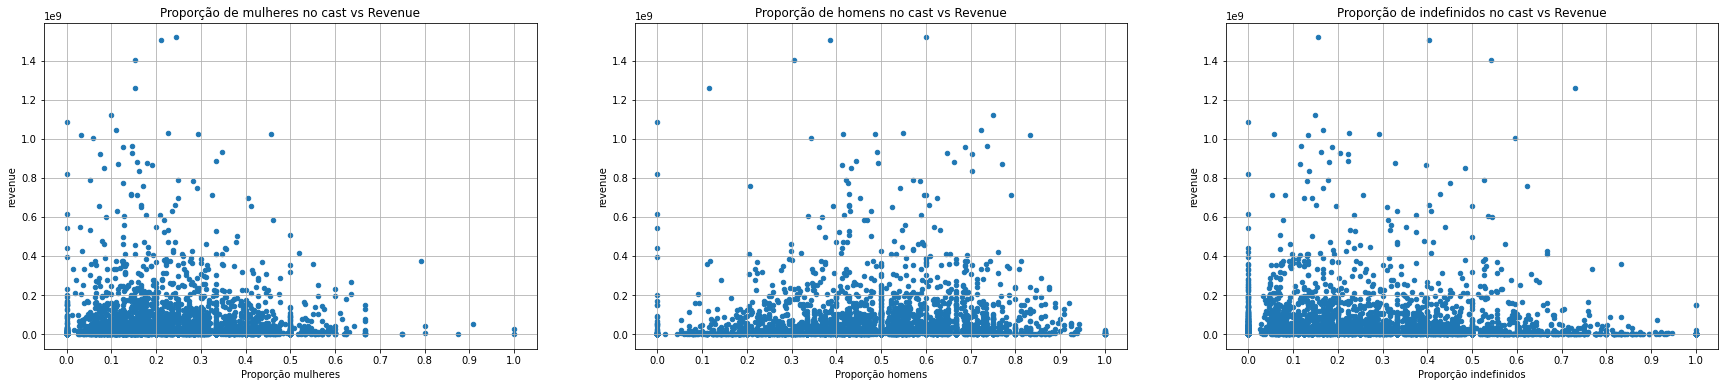

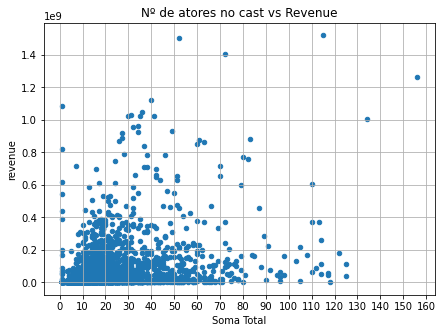

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,6))
cast_data.plot(kind = 'scatter', x = 'Proporção mulheres', y = 'revenue', ax = axs[0], title = 'Proporção de mulheres no cast vs Revenue', xticks=(np.arange(0,1.1,0.1)), grid=True)
cast_data.plot(kind = 'scatter', x = 'Proporção homens', y = 'revenue', ax = axs[1], title = 'Proporção de homens no cast vs Revenue', xticks=(np.arange(0,1.1,0.1)), grid=True)
cast_data.plot(kind = 'scatter', x = 'Proporção indefinidos', y = 'revenue', ax = axs[2], title = 'Proporção de indefinidos no cast vs Revenue', xticks=(np.arange(0,1.1,0.1)), grid=True)
plt.show()

cast_data.plot(kind = 'scatter', x = 'Soma Total', y = 'revenue', title = 'Nº de atores no cast vs Revenue', figsize=(7,5), xticks=(np.arange(0,170,10)), grid=True)
plt.show()

Analisando os gráficos é possível constatar que no gráfico da proporção de mulheres existe uma maior concentração de pontos abaixo dos 0.5, e que acima deste valor em geral os revenues obtidos são relativamente baixos, tendo um maior revenue quando a proporção de mulheres no elenco está entre [0.05, 0.35].

Para o gráfico da proporção de homens no elenco, observa-se uma maior concentração de pontos para o intervalo de [0.2, 0.9] e em termos da proporção de homens que gera um maior revenue, pode concluir-se que quando a proporção de homens se encontra no intervalo de [0.4, 0.8] existe um maior revenue.

Para o gráfico da proporção dos indeterminados, observa-se uma grande concentração de pontos [0, 0.5], havendo um maior revenue para o intervalo de [0, 0.3].

Está-se a analisar o conjuntos dos indeterminados, numa tentativa de perceber se dos géneros indeterminados serão mais mulheres ou mais homens que não puderam ser devidamente anotados. De acordo, com o gráfico da proporção dos indeterminados embora haja uma mistura dos dois parece existir um número maior de mulheres por indentificar do que homens, e observando a distribuição de pontos dos outros dois gráficos, existe uma grande probabilidade que maior parte dos pontos do gráfico das proporções indeterminadas, que sejam =< 0.4 sejam mulheres e que > 0.4 sejam homens.

No gráfico do nº total de atores, existe uma concentração maior de pontos para o nº total de atores entre ]0, 70] e observando a forma do gráfico pode-se estimar que o pico seria para cerca de 50 atores/filme, não considerando os pontos que saiem da tendência da distribuição dos dados.

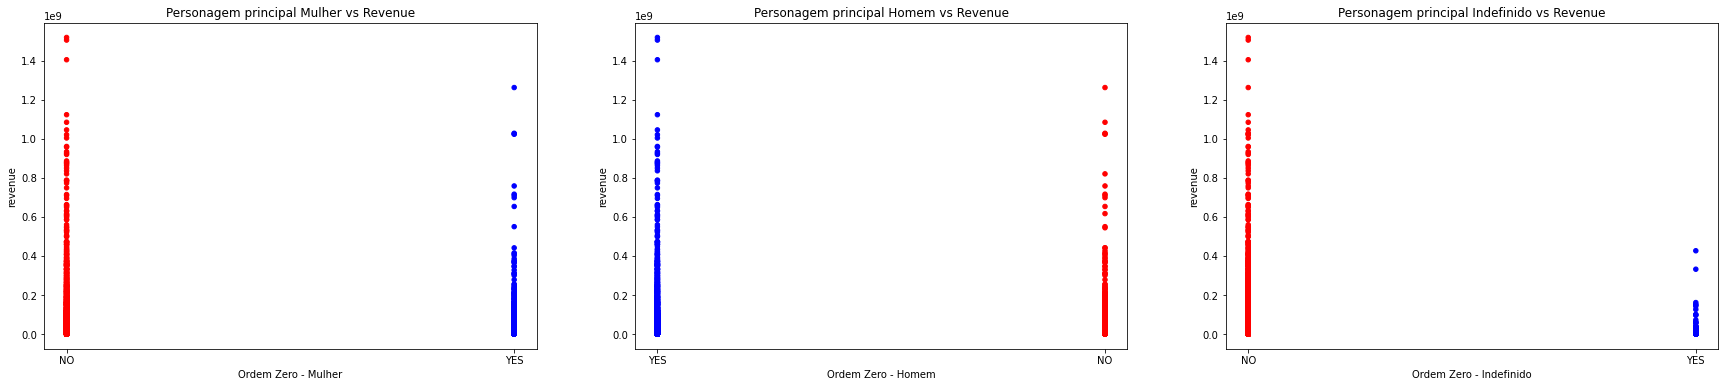

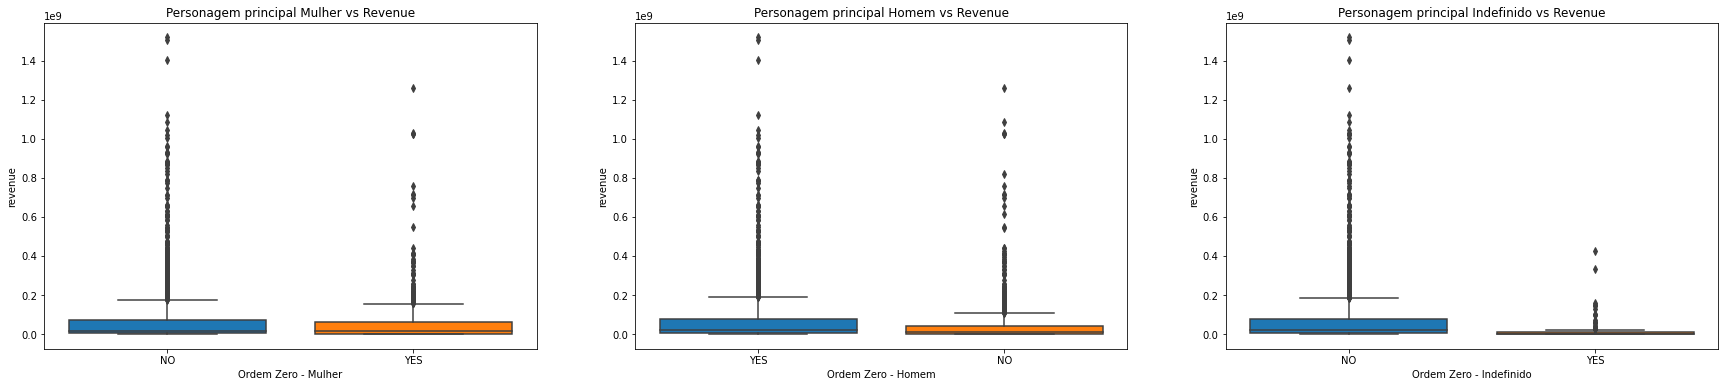

In [22]:
#Ordem zero: Homem vs Mulher
colors_m = np.where(cast_data['Ordem Zero - Mulher']=='YES', 'b', 'r')
colors_h = np.where(cast_data['Ordem Zero - Homem']=='YES', 'b', 'r')
colors_i = np.where(cast_data['Ordem Zero - Indefinido']=='YES', 'b', 'r')

fig2, axs2 = plt.subplots(nrows=1, ncols=3, figsize=(30,6))
cast_data.plot(kind = 'scatter', x = 'Ordem Zero - Mulher', y = 'revenue', ax = axs2[0], title = 'Personagem principal Mulher vs Revenue', c = colors_m)
cast_data.plot(kind = 'scatter', x = 'Ordem Zero - Homem', y = 'revenue', ax = axs2[1], title = 'Personagem principal Homem vs Revenue', c = colors_h)
cast_data.plot(kind = 'scatter', x = 'Ordem Zero - Indefinido', y = 'revenue', ax = axs2[2], title = 'Personagem principal Indefinido vs Revenue', c = colors_i)
plt.show()

plt.figure(figsize=(30,6))
plt.subplot(131)
sns.boxplot(x='Ordem Zero - Mulher', y='revenue', data=cast_data, saturation=1)
plt.title('Personagem principal Mulher vs Revenue')
plt.subplot(132)
sns.boxplot(x='Ordem Zero - Homem', y='revenue', data=cast_data, saturation=1)
plt.title('Personagem principal Homem vs Revenue')
plt.subplot(133)
sns.boxplot(x='Ordem Zero - Indefinido', y='revenue', data=cast_data, saturation=1)
plt.title('Personagem principal Indefinido vs Revenue')
plt.show()

In [23]:
M_castmedio = cast_data.groupby('Ordem Zero - Mulher')['revenue'].mean()
H_castmedio = cast_data.groupby('Ordem Zero - Homem')['revenue'].mean()
I_castmedio = cast_data.groupby('Ordem Zero - Indefinido')['revenue'].mean()

print('Género de ator principal que gera maior revenue:')
print('Homem:', H_castmedio.idxmax(), '      Revenue:', max(H_castmedio))
print('Mulher:', M_castmedio.idxmax())
print('Indefinido:', I_castmedio.idxmax())


Género de ator principal que gera maior revenue:
Homem: YES       Revenue: 74290785.77095516
Mulher: NO
Indefinido: NO


Observando os gráficos e considerando que a ordem pela qual aparecem os atores tem haver com a sua importância no filme, é possível perceber que o género que em média permite gerar um maior revenue é o 2 - Homem.

#### 2.2.2 Análise de acordo com o ator <a class="anchor" id="section_2_2_2"></a>

In [24]:
cast_exp = cast_data.explode('nome')
cast_exp_mean = cast_exp.groupby('nome')['revenue'].mean()
cast_exp_count = cast_exp.groupby('nome')['revenue'].count()

Cast_mean_frame = cast_exp_mean.to_frame()
Cast_mean_final = Cast_mean_frame.reset_index()
Cast_count_frame = cast_exp_count.to_frame()
Cast_count_final = Cast_count_frame.reset_index()

#print(Cast_mean_final) #Revenue por ator
#print(Cast_count_final) #Contagem de filmes por ator 

ator_data = pd.concat([Cast_mean_final['nome'], Cast_mean_final['revenue'], Cast_count_final['revenue']], axis=1, keys=['nome', 'revenue médio', 'nº filmes'])
ator_data

,nome,revenue médio,nº filmes
0,,4.351898e+06,13
1,Larry Mullen Jr.,2.273084e+07,1
2,Michael Hayden,6.020420e+05,1
3,"""Weird Al"" Yankovic",3.437860e+05,1
4,'Sister' Carol East,8.362969e+06,1
...,...,...,...
38585,√íscar Foronda,1.846968e+07,1
38586,√òrjan Gamst,1.011068e+06,2
38587,√örsula Corber√≥,8.502590e+05,1
38588,≈ûafak Karali,1.387300e+05,1


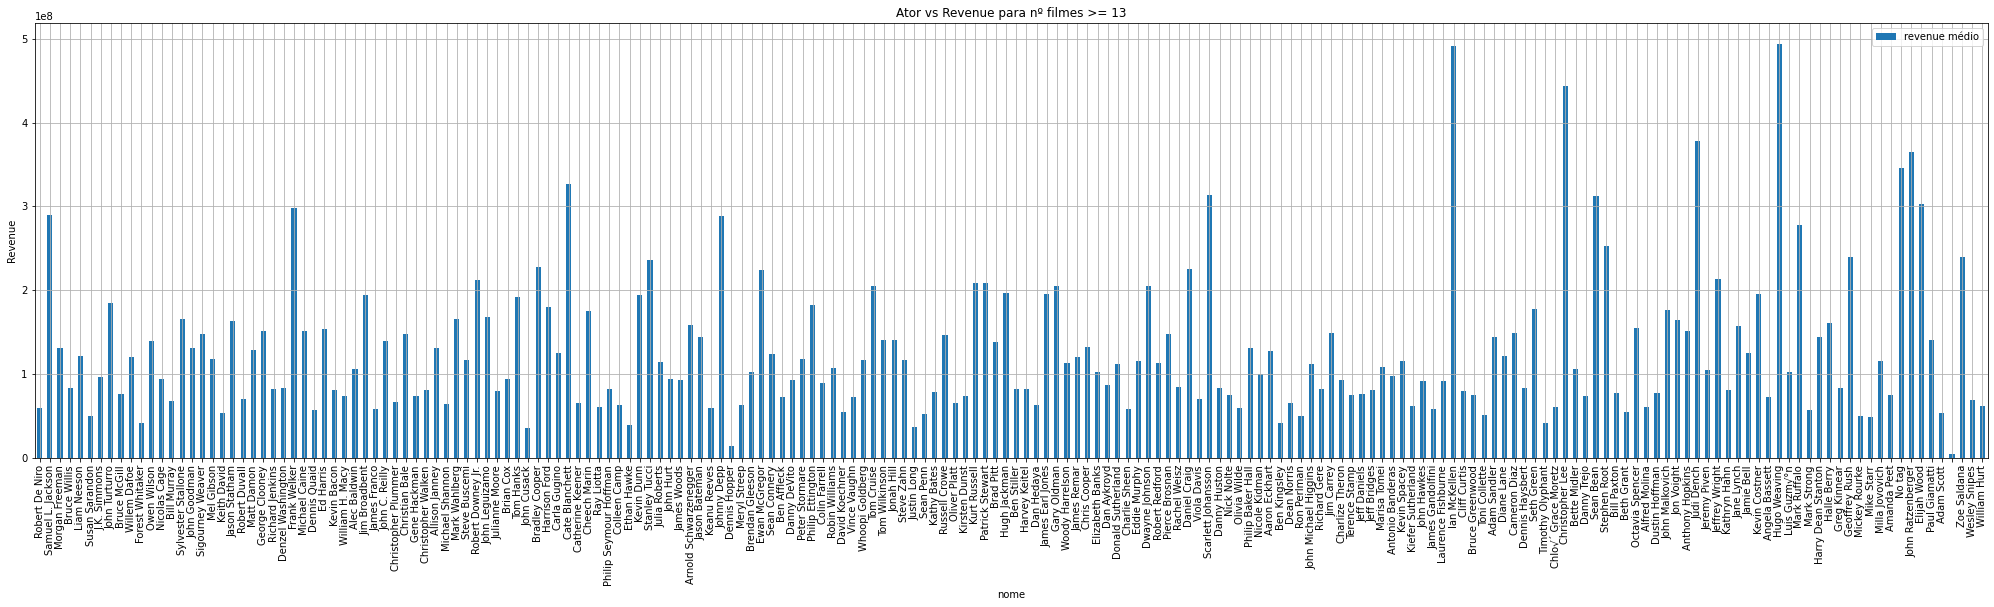

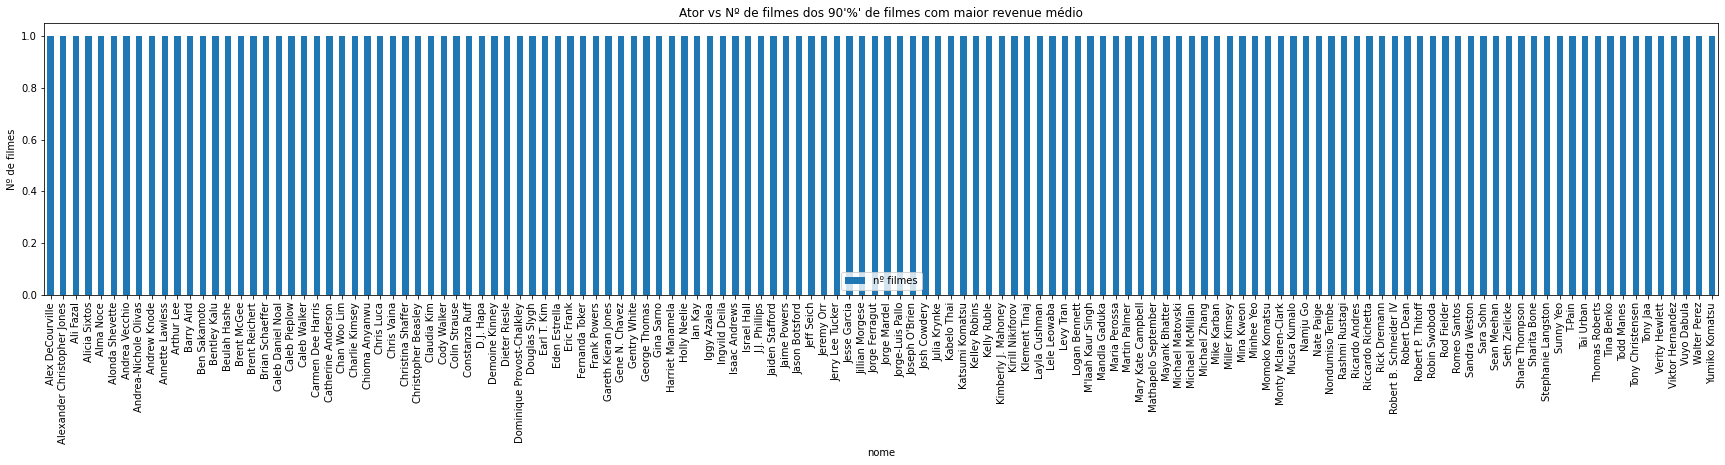

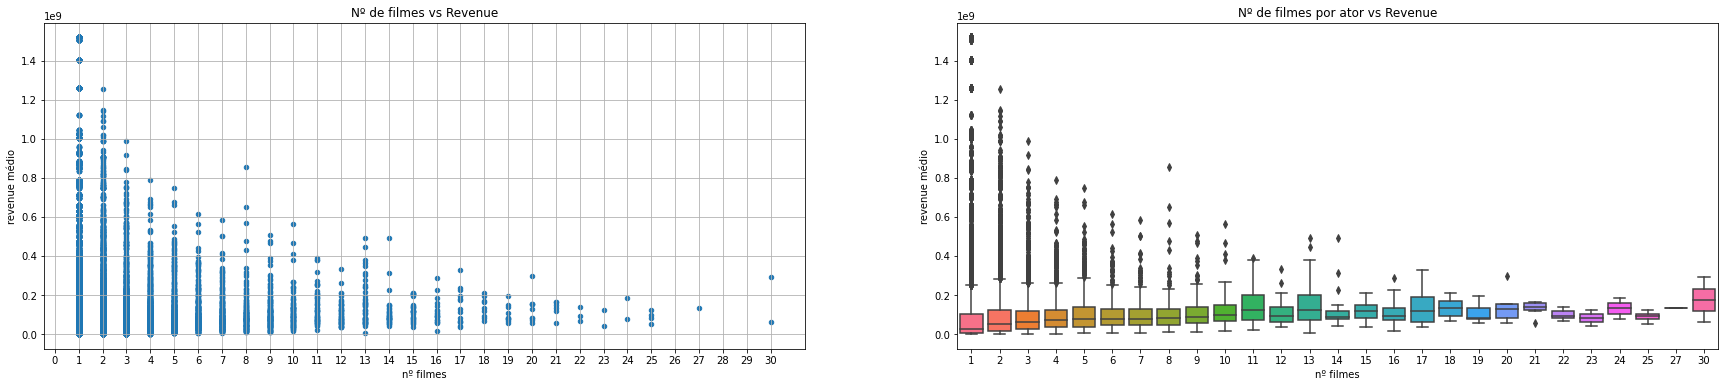

In [25]:
ator_data_nome_filme = ator_data.sort_values(by="nº filmes", ascending=False)

ator_data_nome_filme.loc[ator_data['nº filmes'] >= 13].plot(kind = 'bar', x = 'nome', y = 'revenue médio', title = 'Ator vs Revenue para nº filmes >= 13', figsize=(35,8))
plt.xticks(rotation = 90)
plt.ylabel('Revenue')
plt.grid()
plt.show()
ator_data.loc[ator_data['revenue médio'] >= max(ator_data['revenue médio'])*0.90].plot(kind = 'bar', x = 'nome', y = 'nº filmes', title = "Ator vs Nº de filmes dos 90'%' de filmes com maior revenue médio", figsize=(30,5))
plt.ylabel('Nº de filmes')
plt.xticks(rotation = 90)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30,6))
ator_data.plot(kind = 'scatter', x = 'nº filmes', y = 'revenue médio', title = 'Nº de filmes vs Revenue',  ax=axs[0], xticks = np.arange(0, max(ator_data['nº filmes'])+1, 1), grid = True)
plt.subplot(122)
sns.boxplot(x=ator_data['nº filmes'], y=ator_data['revenue médio'], palette="husl", saturation=1)
plt.title('Nº de filmes por ator vs Revenue')
plt.show()

In [26]:
Nfilmes_castmedio = ator_data.groupby('nº filmes')['revenue médio'].mean()
print('Nº de filmes:', Nfilmes_castmedio.idxmax(), 'Revenue:', max(Nfilmes_castmedio),'\n')
print(Nfilmes_castmedio.sort_values(ascending=False)[:10])

Nº de filmes: 30 Revenue: 174921319.96666667 

nº filmes
30    1.749213e+08
13    1.564577e+08
11    1.463974e+08
17    1.377167e+08
18    1.359955e+08
27    1.316102e+08
20    1.308822e+08
24    1.307109e+08
21    1.299223e+08
10    1.252497e+08
Name: revenue médio, dtype: float64


Observando os gráficos pode concluir-se que no 1º gráfico o revenue vai variando com o ator, no entanto, para os 300 filmes que produziram maior revenue, os atores que levam a um maior revenue apenas aparecem mencionados uma vez no conjunto de todos os filmes.

Em relação à variação do revenue médio com o nº de filmes, pode concluir-se que o revenue médio atinge valores mais elevados quando o nº de filmes é 1, e esta capacidade de atingir valores tão elevados do revenue vai diminuindo, o que faz sentido, pois nem todos os filmes em que os atores participam têm um alto revenue e por isso, é normal que haja uma tendência de decréscimo do valor máximo que o revenue atinge. No entanto, é possível concluir que os atores que aparecem nos dados em 30 filmes são os que apresentam, em média, um maior revenue médio. Contudo, atores que tenham feito 30 filmes apenas existem 2 casos e por isso, pode ter sido um acaso esta média mais elevada, por isso, foi-se ver a segunda maior média que corresponde aos atores que aparecem em 13 filmes diferentes nos dados.

Podendo, então concluir-se que os atores que aparecem em mais do que cerca 10, tem uma grande influência no revenue, pois no último gráfico é possível observar a tendência crescente do revenue com o nº de filmes por ator.

#### 2.2.3 Normalização dos dados <a class="anchor" id="section_2_2_3"></a>

In [27]:
cast_data_teste = pd.concat([dados_teste['cast'], dados_teste['cast'], dados_teste['cast']], axis=1, keys=['genero', 'nome', 'id_nome'])

cast_data_teste['nome'] = cast_data_teste['nome'].fillna('NaN')
cast_data_teste['nome'] = cast_data_teste['nome'].apply(text_to_value, obj='name')
cast_data_teste['nome'] = cast_data_teste['nome'].str.split(';')

cast_data_teste['genero'] = cast_data_teste['genero'].fillna('NaN')
cast_data_teste['genero'] = cast_data_teste['genero'].apply(text_to_value, obj='gender')
cast_data_teste['genero'] = cast_data_teste['genero'].str.split(';')

cast_data_teste['id_nome'] = cast_data_teste['id_nome'].fillna('NaN')
cast_data_teste['id_nome'] = cast_data_teste['id_nome'].apply(text_to_value, obj='id')
cast_data_teste['id_nome'] = cast_data_teste['id_nome'].str.split(';')

In [28]:
cast_data_teste

,genero,nome,id_nome
id,,,
3001,"[0, 1, 1, 1, 0, 0, 0]","[Craig Blair, Emily Bauer, Sarah Natochenny, I...","[82140, 111768, 111767, 73044, 108721, 111779,..."
3002,"[1, 0, 1, 0, 0, 0, 0, 0, 2, 2]","[Allison Hayes, William Hudson, Yvette Vickers...","[104412, 108299, 89163, 34211, 140411, 14365, ..."
3003,"[1, 2, 1, 2, 1, 2, 2, 2, 1]","[Meg Ryan, Matthew Broderick, Kelly Preston, T...","[5344, 4756, 11164, 10698, 21151, 21152, 21153..."
3004,"[1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, ...","[Lubna Azabal, M√©lissa D√©sormeaux-Poulin, Ma...","[77498, 84573, 88592, 38526, 196737, 970213, 2..."
3005,"[2, 2, 2, 2]","[Dennis Hopper, Peter Bart, Warren Beatty, Car...","[2778, 71766, 6449, 13716]"
...,...,...,...
7394,"[1, 2, 2, 2, 1, 1, 1, 2, 2, 2]","[Angelina Jolie, Antonio Banderas, Gregory Itz...","[11701, 3131, 21142, 12536, 21143, 21144, 2114..."
7395,"[2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, ...","[Seth Green, Matthew Lillard, Dax Shepard, Ant...","[13922, 26457, 51298, 60373, 66574, 66573, 154..."
7396,"[2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, ...","[Paul Newman, Charlotte Rampling, Jack Warden,...","[3636, 44079, 5251, 2091, 47137, 32225, 2651, ..."


In [29]:
cast_exp_treino = cast_data.explode('nome')
cast_exp_teste = cast_data_teste.explode('nome')

cast_exp_count_treino = cast_exp_treino.groupby('nome')['id_nome'].count()
cast_exp_count_teste = cast_exp_teste.groupby('nome')['id_nome'].count()

Cast_count_frame_treino = cast_exp_count_treino.to_frame()
Cast_count_final_treino = Cast_count_frame_treino.reset_index()
Cast_count_frame_teste = cast_exp_count_teste.to_frame()
Cast_count_final_teste = Cast_count_frame_teste.reset_index()
Cast_count_final_treino = Cast_count_final_treino.values.tolist()
Cast_count_final_teste = Cast_count_final_teste.values.tolist()
Cast_contagem_nomes = Cast_count_final_treino + Cast_count_final_teste
data_frame_cast_contagem = pd.DataFrame(Cast_contagem_nomes, columns = ['nome', 'nº filmes'])

data_frame_cast_contagem_final = data_frame_cast_contagem.groupby('nome')['nº filmes'].sum()
data_frame_cast_contagem_final.head()
dict_contagem_nfilme = data_frame_cast_contagem_final.to_dict()

##### __Normalização dos dados de treino__

Em relação à análise de acordo com o género, considerou-se relevante ver a proporção de homens e mulheres e qual o género da personagem principal, tendo-se considerado para os casos em que não existia ou era indefinido que o valor seria de 0.

In [30]:
soma_total_norm = funcao_normaliza(cast_data['Soma Total'])

dados_treino_norm['Proporção Mulheres'] = cast_data['Proporção mulheres']
dados_treino_norm['Proporção Homens'] = cast_data['Proporção homens']
dados_treino_norm['Proporção Indefinidos'] = cast_data['Proporção indefinidos']
dados_treino_norm['Nº total de atores'] = soma_total_norm

In [31]:
# Personagem principal - ordem 0:
# 1 se é homem
# 0.5 se é mulher
# 0 se é indefinido ou 'no tag' 

ordem_zero_pp = []
ind_o =[]
for o in range(len(ordem_zero_h)):
    if ordem_zero_m[o] == 'YES':
        ordem_zero_pp.append(0.5)

    elif ordem_zero_h[o] == 'YES':
        ordem_zero_pp.append(1)

    elif ordem_zero_i[o] == 'YES':
        ordem_zero_pp.append(0)
    else:
        ordem_zero_pp.append(0)

dados_treino_norm['ordem_0'] = ordem_zero_pp

Na análise de acordo com o ator, não se considerou relevante o ator em si, mas o número de vezes que um ator aparece nos diferentes filmes presentes nos dados. Como não se pode fazer para os atores todos, de todos os filmes, considerou-se o protagonista de cada filme e viu-se em quantos filmes esse ator está presente nos diversos filmes do conjunto de dados, desta forma não é ultrapassado o nº de linhas.

In [32]:
ordem_zero_ator=[]
lista_nomecast = cast_data['nome'].to_list()

for at in range(len(lista_nomecast)):
    ordem_zero_ator.append(lista_nomecast[at][0])

cast_data['Ordem Zero ator'] = ordem_zero_ator

oza_novo=[]
for ioza in ordem_zero_ator:
    oza_novo.append(dict_contagem_nfilme[ioza])
cast_data['numb_final'] = oza_novo

In [33]:
ator_contafilmes = funcao_normaliza(cast_data['numb_final'])
dados_treino_norm['n_filmes_por_ator'] = ator_contafilmes

##### __Normalização dos dados de teste__

In [34]:
cast_mulheres_teste = []
cast_homens_teste = []
cast_indefinidos_teste = []
cast_total_teste = []

for ind_ord_teste in cast_data_teste['genero']:
    
    indefinidos_teste = 0
    homens_teste = 0
    mulheres_teste = 0
    for i in range(len(ind_ord_teste)):    
        if ind_ord_teste[i] == '1':
            mulheres_teste += 1
        elif ind_ord_teste[i] == '2':
            homens_teste += 1
        elif ind_ord_teste[i] == '0':
            indefinidos_teste += 1

    cast_mulheres_teste.append(mulheres_teste)
    cast_homens_teste.append(homens_teste)
    cast_indefinidos_teste.append(indefinidos_teste)
    cast_total_teste.append(len(ind_ord_teste))
    
cast_data_teste['Soma Mulheres'] = cast_mulheres_teste
cast_data_teste['Soma Homens'] = cast_homens_teste
cast_data_teste['Soma Indefinidos'] = cast_indefinidos_teste
cast_data_teste['Soma Total'] = cast_total_teste
cast_data_teste['Proporção mulheres'] = cast_data_teste['Soma Mulheres']/cast_data_teste['Soma Total']
cast_data_teste['Proporção homens'] = cast_data_teste['Soma Homens']/cast_data_teste['Soma Total']
cast_data_teste['Proporção indefinidos'] = cast_data_teste['Soma Indefinidos']/cast_data_teste['Soma Total']

soma_total_teste_norm = funcao_normaliza(cast_data_teste['Soma Total'])

dados_teste_norm['Proporção Mulheres'] = cast_data_teste['Proporção mulheres'].to_list()
dados_teste_norm['Proporção Homens'] = cast_data_teste['Proporção homens'].to_list()
dados_teste_norm['Proporção Indefinidos'] = cast_data_teste['Proporção indefinidos'].to_list()
dados_teste_norm['Nº total de atores'] = soma_total_teste_norm

In [35]:
dict_contagem_nfilme = data_frame_cast_contagem_final.to_dict()

In [36]:
ordem_zero_ator_teste=[]
lista_nomecast_teste = cast_data_teste['nome'].to_list()

for at_teste in range(len(lista_nomecast_teste)):
    ordem_zero_ator_teste.append(lista_nomecast_teste[at_teste][0])

cast_data_teste['Ordem Zero ator'] = ordem_zero_ator_teste

oza_novo_teste=[]
for ioza_teste in ordem_zero_ator_teste:
    oza_novo_teste.append(dict_contagem_nfilme[ioza_teste])
cast_data_teste['numb_final'] = oza_novo_teste

In [37]:
ordem_zero_pp_teste = []

for ind_ord_teste in cast_data_teste['genero']:
    if ind_ord_teste[0] == '1':
        ordem_zero_pp_teste.append(0.5)
    elif ind_ord_teste[0] == '2':
        ordem_zero_pp_teste.append(1)
    else:
        ordem_zero_pp_teste.append(0)

dados_teste_norm['ordem_0'] = ordem_zero_pp_teste

In [38]:
ator_contafilmes_teste = funcao_normaliza(cast_data_teste['numb_final'])
dados_teste_norm['n_filmes_por_ator'] = ator_contafilmes_teste

### __2.2 Runtime__ <a class="anchor" id="section_2_2"></a>

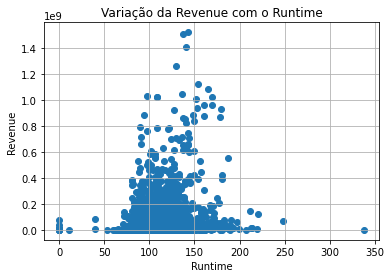

In [39]:
plt.scatter(dados_treino['runtime'], dados_treino['revenue'])
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Variação da Revenue com o Runtime')
plt.grid()

In [40]:
dados_treino['runtime'].describe()

count    2998.000000
mean      107.856571
std        22.086434
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [41]:
Run_mean = dados_treino.groupby('runtime')['revenue'].mean()
print('Runtime:', Run_mean.idxmax(), '\nRevenue:', max(Run_mean))

Runtime: 169.0 
Revenue: 991051784.0


Observando o gráfico é possível verificar que existe um maior Revenue para os filmes que têm um runtime entre [90; 170] min.

#### 2.2.1 Normalização dos dados <a class="anchor" id="section_2_2_1"></a>

In [42]:
run_nan = pd.DataFrame()
run_nan['runtime'] = dados_treino['runtime']
rows_with_nan = [index for index, row in run_nan.iterrows() if row.isnull().any()]
print(rows_with_nan)

run_nan['runtime'][1336] = 2*60+10
run_nan['runtime'][2303] = 1*60+50

[1336, 2303]


##### __Normalização dos dados de treino__

In [43]:
runtime_norm = funcao_normaliza(run_nan['runtime'])
dados_treino_norm['runtime'] = runtime_norm

##### __Normalização dos dados de teste__

In [44]:
run_nan_teste = pd.DataFrame()
run_nan_teste['runtime'] = dados_teste['runtime']
rows_with_nan_teste = [index_teste for index_teste, row_teste in run_nan_teste.iterrows() if row_teste.isnull().any()]
print(rows_with_nan_teste)

run_nan_teste['runtime'][3244] = 60+33 #1h33min
run_nan_teste['runtime'][4490] = 60+31 #1h31min
run_nan_teste['runtime'][4633] = 60+40 #1h40min
run_nan_teste['runtime'][6818] = 60+30 #1h30min

[3244, 4490, 4633, 6818]


In [45]:
runtime_teste_norm = funcao_normaliza(run_nan_teste['runtime'])

dados_teste_norm['runtime'] = runtime_teste_norm

### __2.3 Production Countries__ <a class="anchor" id="section_2_3"></a>

In [46]:
prods_country_data = pd.concat([dados_treino['production_countries'], dados_treino['production_countries'], dados_treino['revenue']], 
                                axis=1, keys=['prod_countries', 'nome', 'revenue'])

prods_country_data['prod_countries'] = prods_country_data['prod_countries'].fillna('NaN')
prods_country_data['prod_countries'] = prods_country_data['prod_countries'].apply(text_to_value, obj='iso_3166_1')
prods_country_data['prod_countries'] = prods_country_data['prod_countries'].str.split(';')

prods_country_data['nome'] = prods_country_data['nome'].fillna('NaN')
prods_country_data['nome'] = prods_country_data['nome'].apply(text_to_value, obj='name')
prods_country_data['nome'] = prods_country_data['nome'].str.split(';')

prods_country_data.head()

,prod_countries,nome,revenue
id,,,
1,[US],[United States of America],12314651
2,[US],[United States of America],95149435
3,[US],[United States of America],13092000
4,[IN],[India],16000000
5,[KR],[South Korea],3923970


In [47]:
prod_ct = prods_country_data.explode('prod_countries')
prod_ct_data = prod_ct.groupby('prod_countries')['revenue'].mean()
prod_ct_data = prod_ct_data.sort_values(ascending=False)
print(prod_ct_data)

prod_countries
SI    4.196514e+08
NZ    3.085592e+08
MT    3.006382e+08
TW    1.799907e+08
IS    1.779278e+08
          ...     
BA    1.387300e+05
ET    4.966700e+04
PH    1.165633e+04
MR    7.406000e+03
CY    1.350000e+02
Name: revenue, Length: 75, dtype: float64


In [48]:
sortprod_ct = prod_ct.groupby('prod_countries')['revenue'].sum()
sortprod_ct = sortprod_ct.sort_values(ascending=False)
print(sortprod_ct)

prod_countries
US    187048227401
GB     27639015794
DE     12719359779
CA      9252955680
FR      8249447774
          ...     
BA          138730
ET           49667
PH           34969
MR            7406
CY             135
Name: revenue, Length: 75, dtype: int64


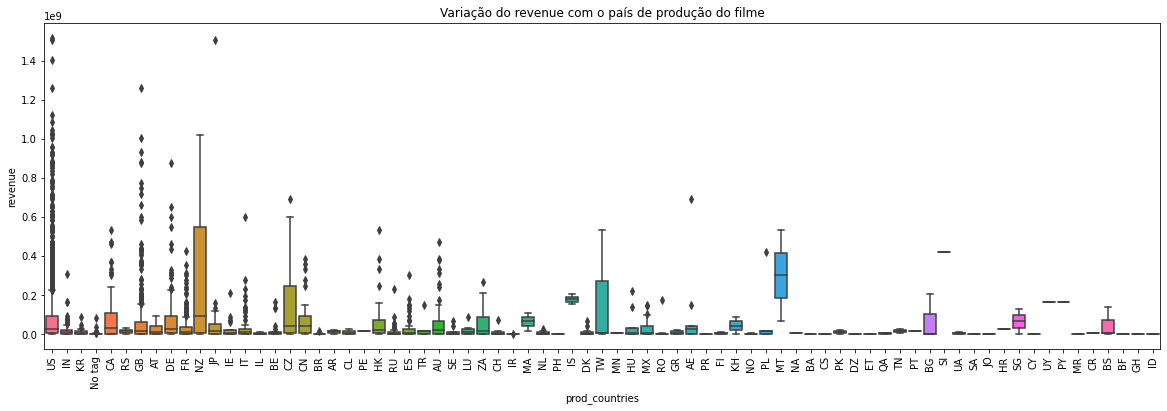

In [49]:
plt.figure(figsize=(20,6))
sns.boxplot(x='prod_countries', y='revenue', palette="husl", data=prod_ct, saturation=1)
plt.title('Variação do revenue com o país de produção do filme')
plt.xticks(rotation=0)
plt.xlabel('prod_countries')
plt.xticks(rotation=90)
plt.show()

In [50]:
lingua_prod_media = prod_ct.groupby('prod_countries')['revenue'].mean()
print('País de produção:', lingua_prod_media.idxmax(), '\nRevenue:', max(lingua_prod_media))

País de produção: SI 
Revenue: 419651413.0


Em termos médios, a observação que apresenta um maior revenue é para 'SI', no entanto, aqueles que permitem obter mais vezes valores mais elevados do revenue são para os 'US' e para a 'GB', também porque são os países que produzem mais filmes.

In [51]:
Pcount = prods_country_data['prod_countries']
mais1 = []
unico = []
numero_paises=[]
legenda_countries = []

for j in Pcount:
    if len(j)!=1:
        mais1.append(j) 
        unico.append('-')
        numero_paises.append(len(j))
        for i in range(len(j)):
            legenda_countries.append(j[i])

    else:
        legenda_countries.append(j[0])
        unico.append(j)
        mais1.append('-')
        numero_paises.append(1)

prods_country_data['unico'] = unico
prods_country_data['+1país'] = mais1
prods_country_data['numero_paises'] = numero_paises

legenda_final = []
while len(legenda_countries) != 0:
    for leg_c in legenda_countries:
        legenda_final.append(leg_c)
        try:
            while True:
                legenda_countries.remove(leg_c)
        except ValueError:
            pass

In [52]:
dict_countries, mais_paises = fazer_dicionario(prods_country_data['+1país'], 2, 76)

for num, val in enumerate(legenda_final):
    dict_countries['{}'.format(val)] = num+1

dict_countries['No tag'] = 0
dict_countries['-'] = 0
#print(dict_countries)

numv1=[]
for item in mais_paises:
    numv1.append(dict_countries[str(item)])
prods_country_data['numb_+1pais_2'] = numv1
prods_country_data['numb_unico'] = [dict_countries[item[0]] for item in prods_country_data['unico']]

_, novo_paises = fazer_dicionario(prods_country_data['prod_countries'], 2)

num_novo=[]
for iom in novo_paises:
    if len(iom) > 1:
        num_novo.append(dict_countries[str(iom)])
    else:
        num_novo.append(dict_countries[iom[0]])
prods_country_data['numb_final'] = num_novo

In [53]:
prods_country_data

,prod_countries,nome,revenue,unico,+1país,numero_paises,numb_+1pais_2,numb_unico,numb_final
id,,,,,,,,,
1,[US],[United States of America],12314651,[US],-,1,0,1,1
2,[US],[United States of America],95149435,[US],-,1,0,1,1
3,[US],[United States of America],13092000,[US],-,1,0,1,1
4,[IN],[India],16000000,[IN],-,1,0,13,13
5,[KR],[South Korea],3923970,[KR],-,1,0,2,2
...,...,...,...,...,...,...,...,...,...
2996,[US],[United States of America],1596687,[US],-,1,0,1,1
2997,"[DK, SE]","[Denmark, Sweden]",180590,-,"[DK, SE]",2,312,0,312
2998,[US],[United States of America],89456761,[US],-,1,0,1,1


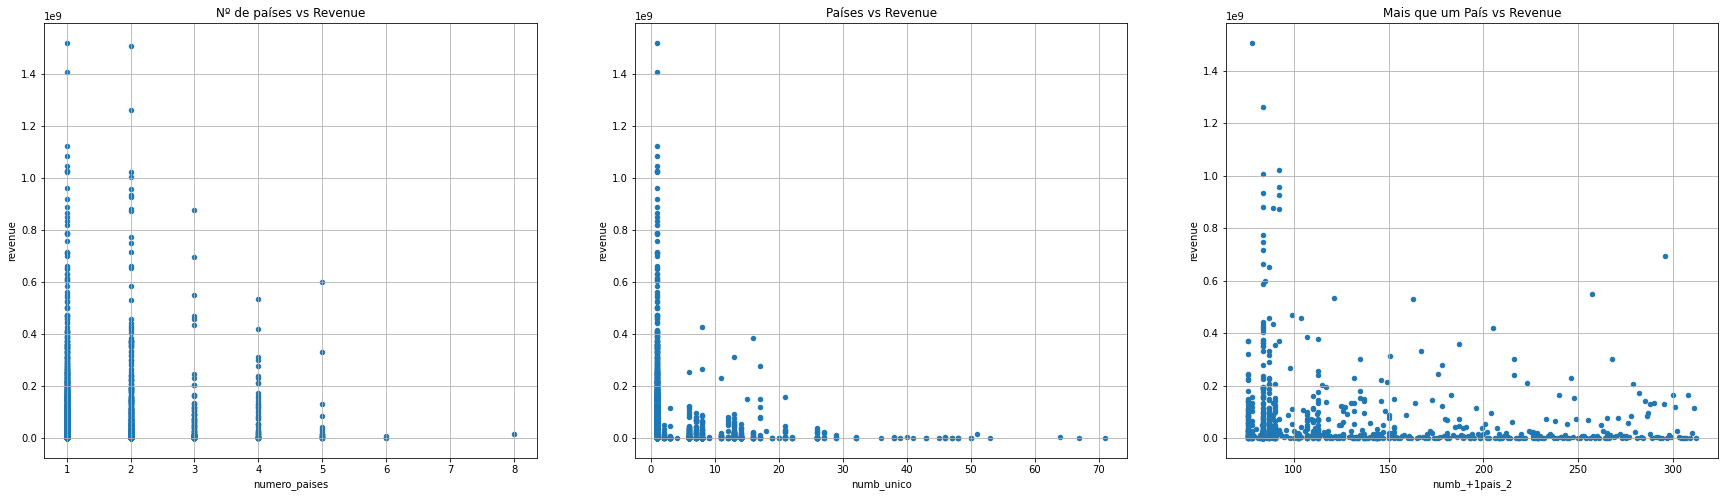

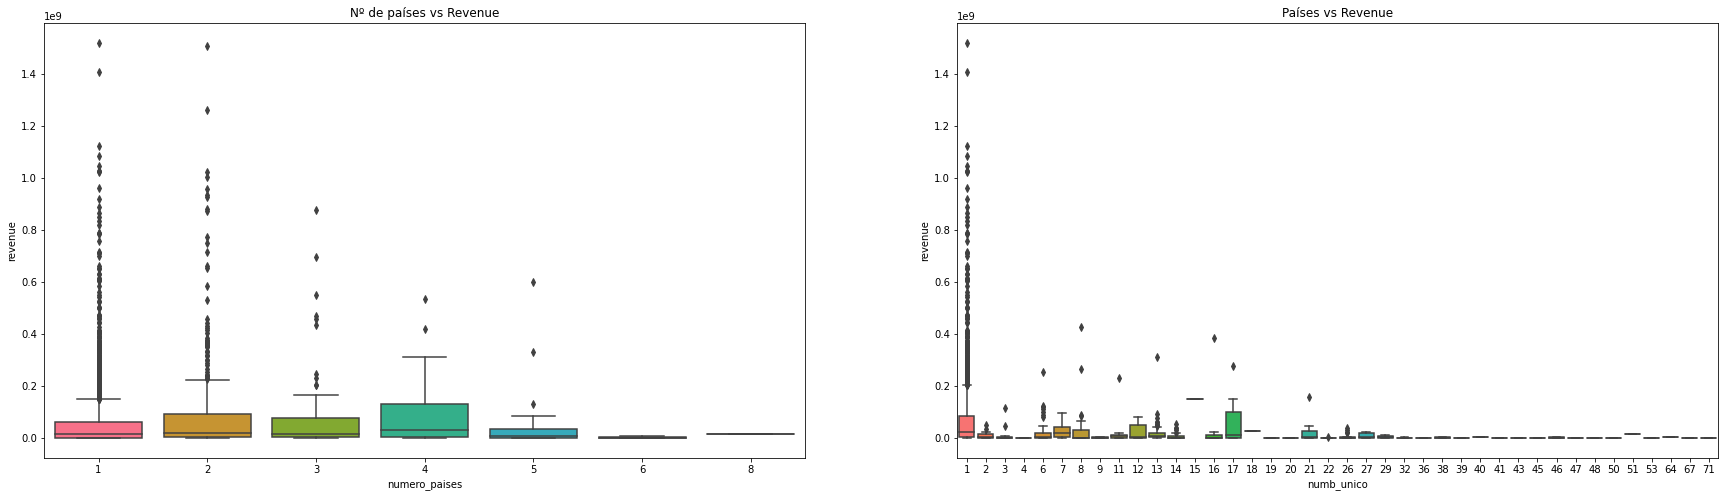

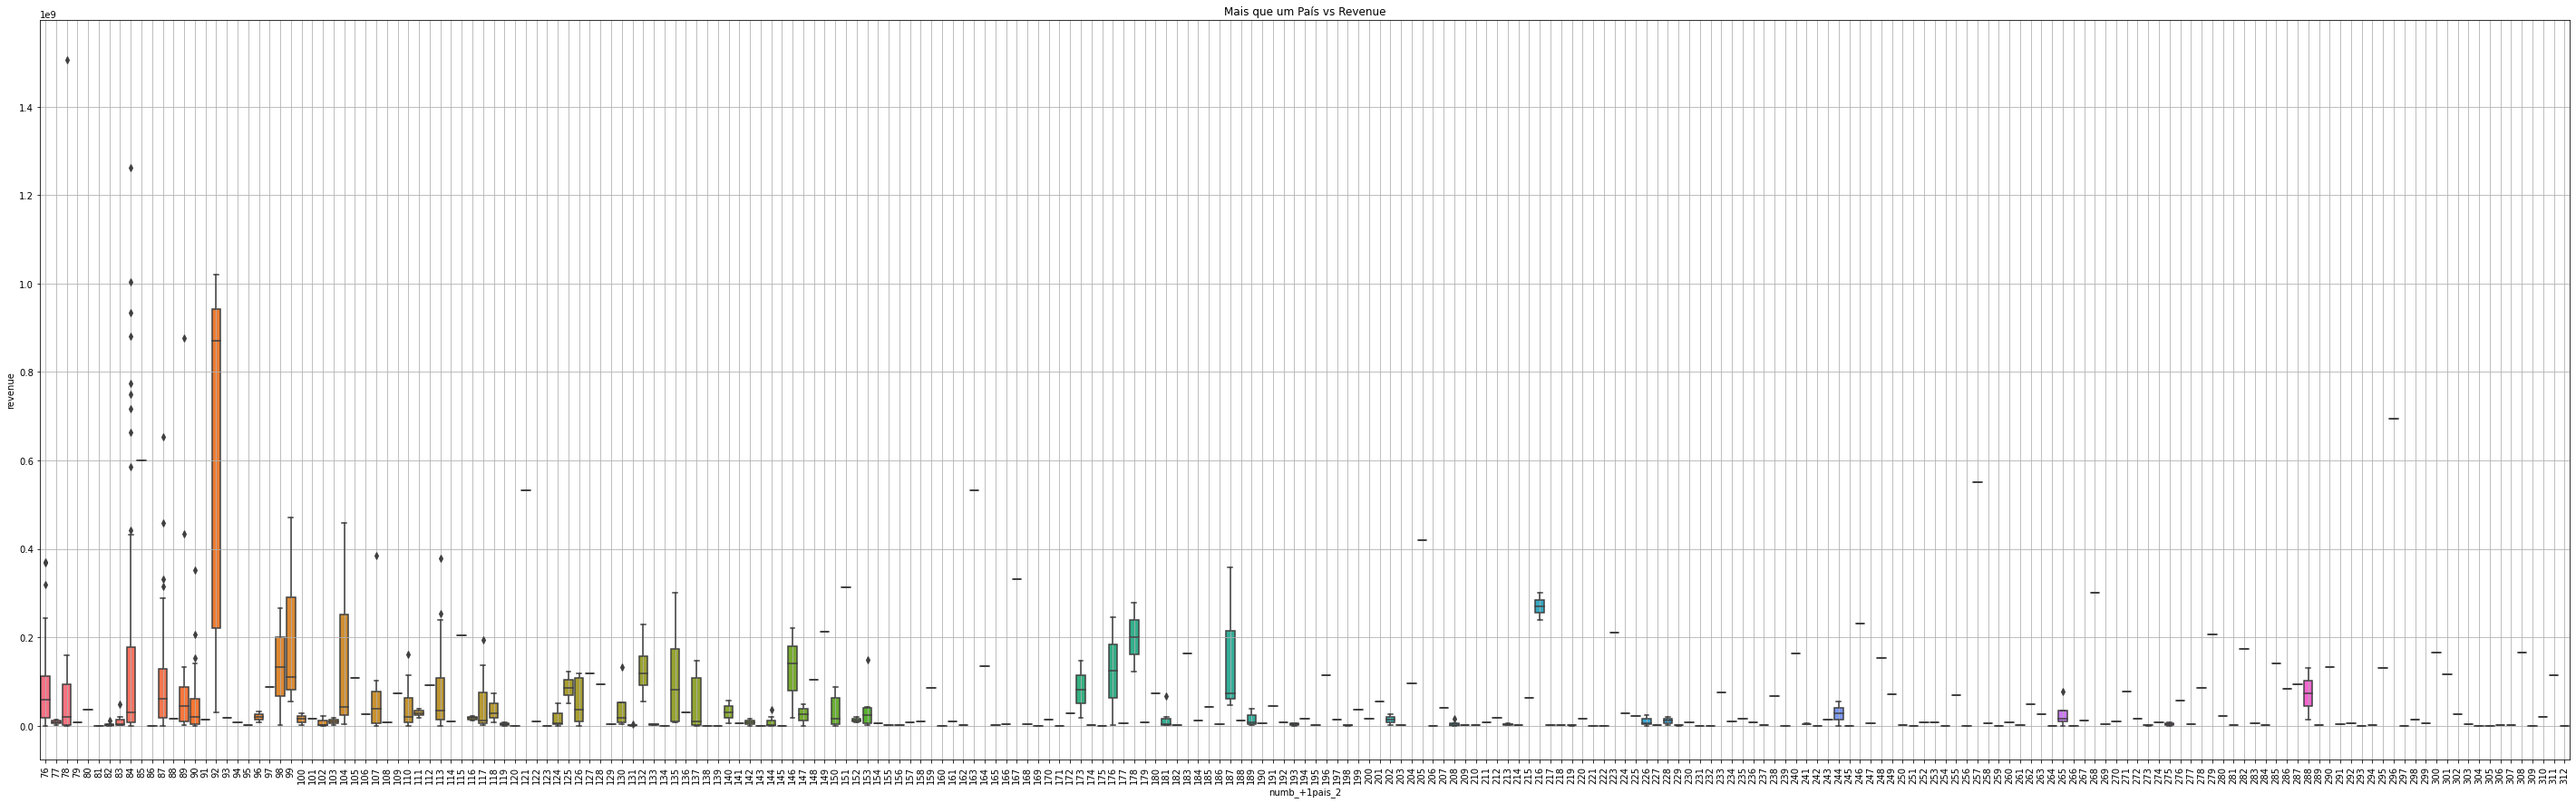

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
prods_country_data.plot(kind = 'scatter', x = 'numero_paises', y = 'revenue', ax = axs[0], title = 'Nº de países vs Revenue', grid = True)
prods_country_data.loc[prods_country_data['numb_unico'] > 0].plot(kind = 'scatter', x = 'numb_unico', y = 'revenue', ax = axs[1], title = 'Países vs Revenue', grid = True)
prods_country_data.loc[prods_country_data['numb_+1pais_2'] > 75].plot(kind = 'scatter', x = 'numb_+1pais_2', y = 'revenue', ax = axs[2], title = 'Mais que um País vs Revenue', grid = True)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
plt.subplot(121)
sns.boxplot(x=prods_country_data['numero_paises'], y=dados_treino['revenue'], palette="husl", saturation=1)
plt.title('Nº de países vs Revenue')
plt.subplot(122)
sns.boxplot(x=prods_country_data['numb_unico'], y=dados_treino['revenue'], palette="husl", saturation=1)
plt.title('Países vs Revenue')
plt.xlim(0.5)
plt.show()
plt.figure(figsize=(50,15))
sns.boxplot(x=prods_country_data['numb_+1pais_2'], y=dados_treino['revenue'], palette="husl", saturation=1)
plt.xlim(0.5)
plt.xticks(rotation=90)
plt.title('Mais que um País vs Revenue')
plt.grid()
plt.show()

In [55]:
key_countries = list(dict_countries.keys())
val_countries = list(dict_countries.values())

N_medio = prods_country_data.groupby('numero_paises')['revenue'].mean()
pais_medio = prods_country_data.groupby('numb_unico')['revenue'].mean()
conj_pais_medio = prods_country_data.groupby('numb_+1pais_2')['revenue'].mean()

print('Nº de países que apresenta em média maior revenue:', N_medio.idxmax(), '                        Revenue:', max(N_medio))
print('País que apresenta em média maior revenue:', key_countries[val_countries.index(pais_medio.idxmax())], '                               Revenue:', max(pais_medio))
print('Conjunto de países que apresenta em média maior revenue:', key_countries[val_countries.index(conj_pais_medio.idxmax())], ' Revenue:',max(conj_pais_medio))

Nº de países que apresenta em média maior revenue: 4                         Revenue: 86812511.31578948
País que apresenta em média maior revenue: TR                                Revenue: 149521495.0
Conjunto de países que apresenta em média maior revenue: ['CZ', 'US', 'AE']  Revenue: 694713380.0


No primeiro gráfico, consegue-se perceber que os filmes que têm 1 ou 2 países na produção do filme, têm uma maior possibilidade de ter um maior revenue. No entanto. em média o que apresenta um maior Revenue é quando o nº de países é 4.

No segundo gráfico observa-se que os países que permitem obter um maior revenue é o 1º que corresponde aos 'US', no entanto, em termos médios aquele que proporciona um maior valor médio é a 'TR'.

Finalmente, no terceiro gráfico, observa-se que em geral os que permitem obter maior revenue são os conjuntos de países correspondentes aos nº 84 e 92, que são respetivamente, ['GB', 'US'] e ['NZ', 'US'], no entanto, aquele que em média permite obter um maior revenue trata-se do conjunto de países ['CZ', 'US', 'AE'].

Estes valores médios, podem ser mais elevados para estes casos, pois existem menos filmes com este conjunto de caraterísticas e dos poucos que existem se tiverem um alto revenue em média será superior ao dos outros.

#### 2.3.1 Normalização dos dados <a class="anchor" id="section_2_3_1"></a>

In [56]:
## DADOS DE TESTE ##

prods_country_teste_data = pd.concat([dados_teste['production_countries'], dados_teste['production_countries']], axis=1, keys=['prod_countries', 'nome'])

prods_country_teste_data['prod_countries'] = prods_country_teste_data['prod_countries'].fillna('NaN')
prods_country_teste_data['prod_countries'] = prods_country_teste_data['prod_countries'].apply(text_to_value, obj='iso_3166_1')
prods_country_teste_data['prod_countries'] = prods_country_teste_data['prod_countries'].str.split(';')

prods_country_teste_data['nome'] = prods_country_teste_data['nome'].fillna('NaN')
prods_country_teste_data['nome'] = prods_country_teste_data['nome'].apply(text_to_value, obj='name')
prods_country_teste_data['nome'] = prods_country_teste_data['nome'].str.split(';')

#prods_country_teste_data

In [57]:
Pcount_teste = prods_country_teste_data['prod_countries']
mais1_teste = []
unico_teste = []
numero_paises_teste=[]
legenda_countries_teste = []

for j_teste in Pcount_teste:
    if len(j_teste)!=1:
        mais1_teste.append(j_teste) 
        unico_teste.append('-')
        numero_paises_teste.append(len(j_teste))
        for i_teste in range(len(j_teste)):
            legenda_countries.append(j_teste[i_teste])

    else:
        legenda_countries_teste.append(j_teste[0])
        unico_teste.append(j_teste)
        mais1_teste.append('-')
        numero_paises_teste.append(1)

prods_country_teste_data['unico'] = unico_teste
prods_country_teste_data['+1país'] = mais1_teste
prods_country_teste_data['numero_paises'] = numero_paises_teste

In [58]:
prod_country_final = pd.DataFrame()
prod_country_final['unico'] = prods_country_data['unico'].to_list() + prods_country_teste_data['unico'].to_list()
prod_country_final['+1país'] = prods_country_data['+1país'].to_list()  + prods_country_teste_data['+1país'].to_list()
prod_country_final['numero_paises'] = prods_country_data['numero_paises'].to_list() + prods_country_teste_data['numero_paises'].to_list()
prod_country_final['paises'] = prods_country_data['prod_countries'].to_list() + prods_country_teste_data['prod_countries'].to_list()

In [59]:
dict_prod_country_final, array_prod_country_final = fazer_dicionario(prod_country_final['paises'], 1, 1)
dict_prod_country_final["['No tag']"] = 0
dict_prod_country_final["-"] = 0

In [60]:
array_prod_country_final
array_h = []
array_rt = []
array_p = []

for h in array_prod_country_final:
    array_h.append(dict_prod_country_final[str(h)])
prod_country_final['paises_dict'] = array_h

for rt in prod_country_final['unico']:
    array_rt.append(dict_prod_country_final[str(rt)])

_, array_mais1_org = fazer_dicionario(prod_country_final['+1país'], 1)
for p in array_mais1_org:
    array_p.append(dict_prod_country_final[str(p)])

prod_country_final['unico_dict'] = array_rt
prod_country_final['mais1_dict'] = array_p

In [61]:
prod_country_final

,unico,+1país,numero_paises,paises,paises_dict,unico_dict,mais1_dict
0,[US],-,1,[US],1,1,0
1,[US],-,1,[US],1,1,0
2,[US],-,1,[US],1,1,0
3,[IN],-,1,[IN],2,2,0
4,[KR],-,1,[KR],3,3,0
...,...,...,...,...,...,...,...
7393,-,"[FR, US]",2,"[FR, US]",26,0,26
7394,[US],-,1,[US],1,1,0
7395,[US],-,1,[US],1,1,0
7396,[US],-,1,[US],1,1,0


In [62]:
prod_countries_norm_final = funcao_normaliza(prod_country_final['paises_dict'])
prod_unico_norm_final = funcao_normaliza(prod_country_final['unico_dict'])
prod_mais1_norm_final = funcao_normaliza(prod_country_final['mais1_dict'])
numero_paises_norm_final = funcao_normaliza(prod_country_final['numero_paises'])

prod_country_final['prod_countries'] = prod_countries_norm_final
prod_country_final['prod_countries_so_1'] = prod_unico_norm_final
prod_country_final['prod_mais_1'] = prod_mais1_norm_final
prod_country_final['numero_paises'] = numero_paises_norm_final

In [63]:
prod_country_final['paises organizados'] = array_prod_country_final
prod_country_explode = prod_country_final.explode('paises organizados')

prod_country_contg_final = prod_country_explode.groupby('paises organizados')['paises'].count()

country_count_frame_final = prod_country_contg_final.to_frame()
country_count_final_final = country_count_frame_final.reset_index()
country_count_final_final = country_count_final_final.values.tolist()

data_frame_prod_country_contagem = pd.DataFrame(country_count_final_final, columns = ['paises', 'nº filmes'])

data_frame_prod_country_contagem_final = data_frame_prod_country_contagem.groupby('paises')['nº filmes'].sum()

dict_contagem_nfilme_countries_final = data_frame_prod_country_contagem_final.to_dict()
dict_contagem_nfilme_countries_final['-'] = 0
dict_contagem_nfilme_countries_final["['no tag']"] = 0

##### Normalização dos dados de treino

In [64]:
dados_treino_norm['prod_countries'] = prod_country_final['prod_countries'][:3000].to_list()
dados_treino_norm['prod_countries_so_1'] = prod_country_final['prod_countries_so_1'][:3000].to_list()
dados_treino_norm['prod_mais_1'] = prod_country_final['prod_mais_1'][:3000].to_list()
dados_treino_norm['numero_paises'] = prod_country_final['numero_paises'][:3000].to_list()

lista_unicocountries = prods_country_data['unico'].to_list()
lista_mpcountries = prods_country_data['+1país'].to_list()
lista_todoscountries = prods_country_data['prod_countries'].to_list()

ouc_novo=[]
for u in lista_unicocountries:
    ouc_novo.append(dict_contagem_nfilme_countries_final[u[0]])
prods_country_data['unico_norm'] = ouc_novo

mpc_novo=[]
for m in range(len(lista_mpcountries)):
    valor_mpc = 0
    for mn in lista_mpcountries[m]:
        valor_mpc += dict_contagem_nfilme_countries_final[mn]
    mpc_novo.append(valor_mpc)

tdc_novo=[]
valor_tdc = []

for tc in range(len(lista_todoscountries)):
  valor_tdc = 0
  for tdc in lista_todoscountries[tc]:
    valor_tdc+=dict_contagem_nfilme_countries_final[tdc]
  tdc_novo.append(valor_tdc)

prods_country_data['mais1_norm'] = mpc_novo
prods_country_data['paises_norm'] = tdc_novo

dados_treino_norm['paises_norm'] = funcao_normaliza(prods_country_data['paises_norm'])
dados_treino_norm['unico_norm'] = funcao_normaliza(prods_country_data['unico_norm'])
dados_treino_norm['mais1_norm'] = funcao_normaliza(prods_country_data['mais1_norm'])

##### Normalização dos dados de teste

In [65]:
dados_teste_norm['prod_countries'] = prod_country_final['prod_countries'][3000:].to_list()
dados_teste_norm['prod_countries_so_1'] = prod_country_final['prod_countries_so_1'][3000:].to_list()
dados_teste_norm['prod_mais_1'] = prod_country_final['prod_mais_1'][3000:].to_list()
dados_teste_norm['numero_paises'] = prod_country_final['numero_paises'][3000:].to_list()


lista_unicocountries_teste = prods_country_teste_data['unico'].to_list()
lista_mpcountries_teste = prods_country_teste_data['+1país'].to_list()
lista_todoscountries_teste = prods_country_teste_data['prod_countries'].to_list()

ouc_novo_teste=[]
for u_teste in lista_unicocountries_teste:
    ouc_novo_teste.append(dict_contagem_nfilme_countries_final[u_teste[0]])
prods_country_teste_data['unico_norm'] = ouc_novo_teste

mpc_novo_teste=[]
for m_teste in range(len(lista_mpcountries_teste)):
    valor_mpc_teste = 0
    for mn_teste in lista_mpcountries_teste[m_teste]:
        valor_mpc_teste += dict_contagem_nfilme_countries_final[mn_teste]
    mpc_novo_teste.append(valor_mpc_teste)

tdc_novo_teste=[]
valor_tdc_teste = []

for tc_teste in range(len(lista_todoscountries_teste)):
  valor_tdc_teste = 0
  for tdc_teste in lista_todoscountries_teste[tc_teste]:
    valor_tdc_teste+=dict_contagem_nfilme_countries_final[tdc_teste]
  tdc_novo_teste.append(valor_tdc_teste)

prods_country_teste_data['mais1_norm'] = mpc_novo_teste
prods_country_teste_data['paises_norm'] = tdc_novo_teste

dados_teste_norm['paises_norm'] = funcao_normaliza(prods_country_teste_data['paises_norm'])
dados_teste_norm['unico_norm'] = funcao_normaliza(prods_country_teste_data['unico_norm'])
dados_teste_norm['mais1_norm'] = funcao_normaliza(prods_country_teste_data['mais1_norm'])

### __2.4 Original language__ <a class="anchor" id="section_2_4"></a>

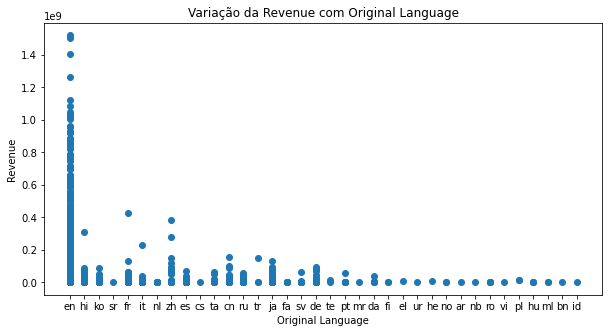

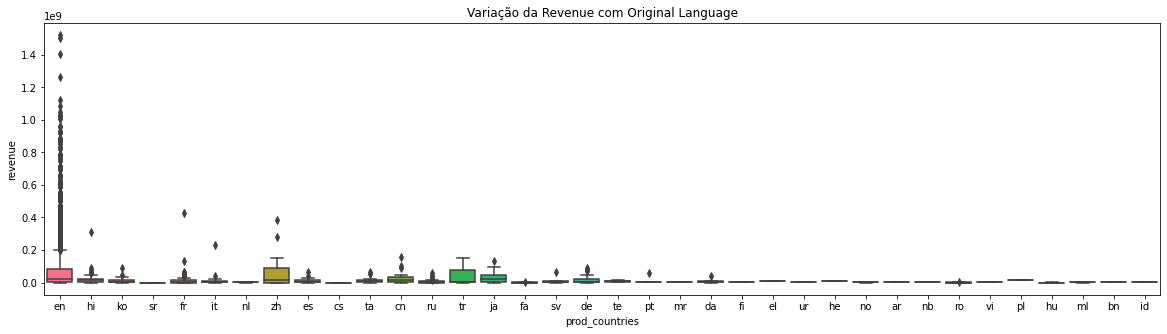

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(dados_treino['original_language'], dados_treino['revenue'])
plt.xlabel('Original Language')
plt.ylabel('Revenue')
plt.title('Variação da Revenue com Original Language') #36
plt.figure(figsize=(20,5))
sns.boxplot(x=dados_treino['original_language'], y=dados_treino['revenue'], palette="husl", saturation=1)
plt.title('Variação da Revenue com Original Language')
plt.xlabel('prod_countries')
plt.show()

In [67]:
lingua_media = dados_treino.groupby('original_language')['revenue'].mean()
print('Língua:', lingua_media.idxmax(), '\nRevenue:', max(lingua_media))

Língua: en 
Revenue: 74665908.71145631


Observando o gráfico, é possível constatar que os filmes em que a língua original é inglês são os que têm maior possibilidade de ter um maior revenue e em média, são também aqueles que permitem um maior revenue.

#### 2.4.1 Normalização dos dados <a class="anchor" id="section_2_4_1"></a>

In [68]:
dados_org_lg_treino_teste = pd.concat([dados_treino['original_language'], dados_teste['original_language']])
dict_orig_lg, _  = fazer_dicionario(dados_org_lg_treino_teste, 1, 1, 1)

In [69]:
contagem_orglingua_treino_teste = dados_org_lg_treino_teste.value_counts()
dict_contagem_orglingua = contagem_orglingua_treino_teste.to_dict()

##### __Normalização dos dados de treino__

In [70]:
orig_lg_novo=[]
orig_lg_novo2=[]

for iol in dados_treino['original_language']:
    orig_lg_novo.append(dict_orig_lg[iol])
    orig_lg_novo2.append(dict_contagem_orglingua[iol])

orig_lg_norm = funcao_normaliza(orig_lg_novo)
orig_lg_norm2 = funcao_normaliza(orig_lg_novo2)

dados_treino_norm['original_language'] = orig_lg_norm
dados_treino_norm['original_language counts'] = orig_lg_norm2

##### __Normalização dos dados de teste__

In [71]:
orig_lg_teste=[]
orig_lg_teste2=[]

for iol_t in dados_teste['original_language']:
    orig_lg_teste.append(dict_orig_lg[iol_t])
    orig_lg_teste2.append(dict_contagem_orglingua[iol_t])

orig_lg_teste_norm = funcao_normaliza(orig_lg_teste)
orig_lg_teste_norm2 = funcao_normaliza(orig_lg_teste2)

dados_teste_norm['original_language'] = orig_lg_teste_norm
dados_teste_norm['original_language counts'] = orig_lg_teste_norm2

### __2.5 Budget__ <a class="anchor" id="section_2_5"></a>

Text(0.5, 1.0, 'Variação da Revenue com o Budget')

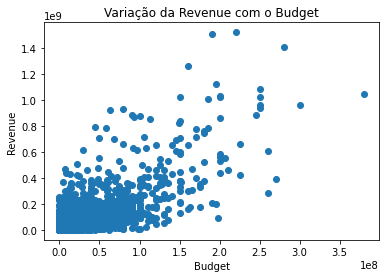

In [72]:
plt.scatter(dados_treino['budget'], dados_treino['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Variação da Revenue com o Budget')

É possível verificar que, em geral, existe um aumento do Revenue com o aumento do Budget. Por isso, considera-se este é um parâmetro relevante para a estimação da Revenue.

#### 2.5.1 Normalização dos dados <a class="anchor" id="section_2_5_1"></a>

##### __Normalização dos dados de treino__

In [73]:
budget_norm = funcao_normaliza(dados_treino['budget'])

dados_treino_norm['budget'] = budget_norm

##### __Normalização dos dados de teste__

In [74]:
budget_teste_norm = funcao_normaliza(dados_teste['budget'])

dados_teste_norm['budget'] = budget_teste_norm

### __2.6 Belongs to collection__ <a class="anchor" id="section_2_6"></a>

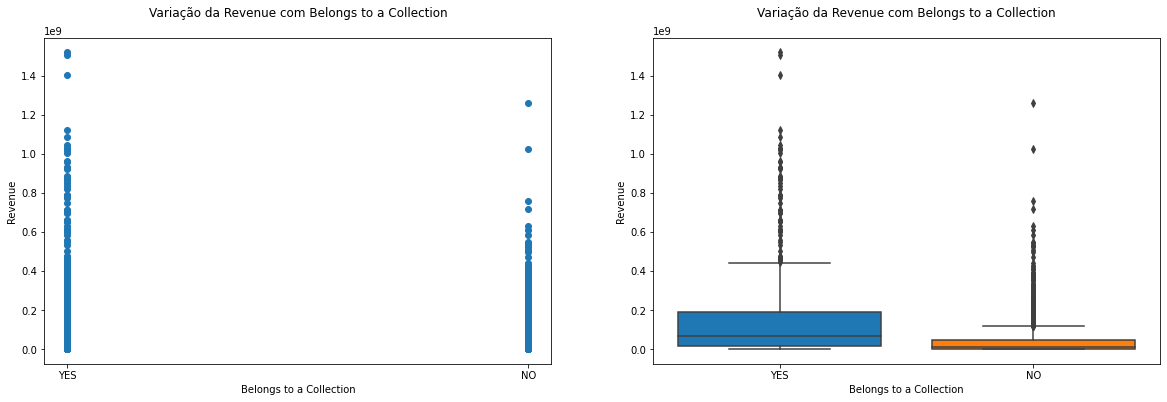

In [75]:
belongs_col = []
revenue_belongs = []

for i in range(len(dados_treino['belongs_to_collection'])):
    if pd.isna(dados_treino['belongs_to_collection'][i+1])==True:
        belongs_col.append('NO')
        revenue_belongs.append(dados_treino['revenue'][i+1])
    else:
        belongs_col.append('YES')
        revenue_belongs.append(dados_treino['revenue'][i+1])

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(belongs_col, dados_treino['revenue'])
plt.xlabel('Belongs to a Collection')
plt.ylabel('Revenue')
plt.title('Variação da Revenue com Belongs to a Collection\n')
plt.subplot(122)
sns.boxplot(x=belongs_col, y=revenue_belongs, saturation=1)
plt.xlabel('Belongs to a Collection')
plt.ylabel('Revenue')
plt.title('Variação da Revenue com Belongs to a Collection\n')
plt.show()

Só cerca de 20% dos dados de treino têm este parâmetro definido, no entanto, é possível verificar que maioria dos filmes com maior Revenue têm o pârametro Belongs-to-a-collection definido.

#### 2.6.1 Normalização dos dados <a class="anchor" id="section_2_6_1"></a>

##### __Normalização dos dados de treino__

In [76]:
# 0 se não pertence a uma coleção
# 1 se pertence a uma coleção

btc_norm = []

for i_btc in belongs_col:
    if i_btc == 'NO':
        btc_norm.append(0)
    else:
        btc_norm.append(1)

dados_treino_norm['belongs_to_collection'] = btc_norm

##### __Normalização dos dados de teste__

In [77]:
btc_teste_norm = []

for i_b_teste in dados_teste['belongs_to_collection']:
    if pd.isna(i_b_teste)==True:
        btc_teste_norm.append(0)
    else:
        btc_teste_norm.append(1)

dados_teste_norm['belongs_to_collection'] = btc_teste_norm

### **2.7 Crew** <a class="anchor" id="section_2_7"></a>

De forma semelhante à variável *cast* é possível obter a seguinte informação a partir da coluna *crew*:
- __credit_id__
- __departement__
- __gender:__ género do membro da equipa (0 - indefinido; 1 - mulher; 2 - homem)
- __id:__ nº específico atribuído ao membro da e
- __job:__ Profissão
- __name:__ Nome do membro da equipa
- __profile_path__: Caminho para o perfil do ator

_Exemplo:_
{'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}

In [78]:
crewdata = pd.concat([dados_treino['crew'], dados_treino['crew'], dados_treino['crew'], dados_treino['crew'], dados_treino['revenue']], axis=1, keys=['credit_id','gender', 'name', 'job', 'revenue'])

#dados referentes ao nome
crewdata['name'] = crewdata['name'].fillna('NaN')
crewdata['name'] = crewdata['name'].apply(text_to_value, obj='name')
crewdata['name'] = crewdata['name'].str.split(';')

crewdata['credit_id'] = crewdata['credit_id'].fillna('NaN')
crewdata['credit_id'] = crewdata['credit_id'].apply(text_to_value, obj='credit_id')
crewdata['credit_id'] = crewdata['credit_id'].str.split(';')

#dados referentes ao género
crewdata['gender'] = crewdata['gender'].fillna('NaN')
crewdata['gender'] = crewdata['gender'].apply(text_to_value, obj='gender')
crewdata['gender'] = crewdata['gender'].str.split(';')

#dados referentes à profissão
crewdata['job'] = crewdata['job'].fillna('NaN')
crewdata['job'] = crewdata['job'].apply(text_to_value, obj='job')
crewdata['job'] = crewdata['job'].str.split(';')

KeyboardInterrupt: 

#### **Análise em função do género**

In [77]:
mulheres_soma2 = []
homens_soma2 = []
indf_soma2 = []
soma_total2 = []
ordem_zero_m2 = []
ordem_zero_h2 = []
ordem_zero_i2 = []

for g_array2 in crewdata['gender']:
    mulher = 0
    homem = 0
    indf = 0
    soma = 0
    
    if g_array2[0] == '1':
        ordem_zero_m2.append('YES')
        ordem_zero_h2.append('NO')
        ordem_zero_i2.append('NO')
    
    elif g_array2[0] == '2':
        ordem_zero_h2.append('YES')
        ordem_zero_i2.append('NO')
        ordem_zero_m2.append('NO')
    
    elif g_array2[0] == '0':
        ordem_zero_i2.append('YES')
        ordem_zero_m2.append('NO')
        ordem_zero_h2.append('NO')
    
    else:
        ordem_zero_m2.append('NO')
        ordem_zero_h2.append('NO')  
        ordem_zero_i2.append('NO')
        
    for i_num2 in range(len(g_array2)):
        if g_array2[i_num2] == '1':
            mulher += 1
        elif g_array2[i_num2] == '2':
            homem += 1
        elif g_array2[i_num2] == '0':
            indf += 1
    
    soma = mulher + homem + indf
    soma_total2.append(soma)
    mulheres_soma2.append(mulher)
    homens_soma2.append(homem)
    indf_soma2.append(indf)

crewdata['Soma Total'] = soma_total2
crewdata['Soma Mulheres'] = mulheres_soma2
crewdata['Soma Homens'] = homens_soma2
crewdata['Soma Indefinido'] = indf_soma2
crewdata['Ordem Zero - Mulher'] = ordem_zero_m2
crewdata['Ordem Zero - Homem'] = ordem_zero_h2
crewdata['Ordem Zero - Indefinido'] = ordem_zero_i2
crewdata['Proporção mulheres'] = crewdata['Soma Mulheres']/crewdata['Soma Total']
crewdata['Proporção homens'] = crewdata['Soma Homens']/crewdata['Soma Total']
crewdata['Proporção indefinidos'] = crewdata['Soma Indefinido']/crewdata['Soma Total']

In [78]:
crewdata.head()

,credit_id,gender,name,job,revenue,Soma Total,Soma Mulheres,Soma Homens,Soma Indefinido,Ordem Zero - Mulher,Ordem Zero - Homem,Ordem Zero - Indefinido,Proporção mulheres,Proporção homens,Proporção indefinidos
id,,,,,,,,,,,,,,,
1,"[59ac067c92514107af02c8c8, 52fe4ee7c3a36847f82...","[0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, ...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...","[First Assistant Director, Director, Writer, C...",12314651,72,0,13,59,NO,NO,YES,0.000000,0.180556,0.819444
2,"[52fe43fe9251416c7502563d, 52fe43fe9251416c750...","[2, 2, 2, 1, 0, 2, 1, 1, 1]","[Garry Marshall, Charles Minsky, John Debney, ...","[Director, Director of Photography, Original M...",95149435,9,4,4,1,NO,YES,NO,0.444444,0.444444,0.111111
3,"[54d5356ec3a3683ba0000039, 56407fa892514170550...","[1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...","[Casting, Music Editor, Executive In Charge Of...",13092000,64,4,11,49,YES,NO,NO,0.062500,0.171875,0.765625
4,"[52fe48779251416c9108d6eb, 52fe48779251416c910...","[0, 0, 0]","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]","[Director, Producer, Writer]",16000000,3,0,0,3,NO,NO,YES,0.000000,0.000000,1.000000
5,"[52fe464b9251416c75073b43, 52fe464b9251416c750...","[0, 0]","[Jong-seok Yoon, Jong-seok Yoon]","[Director, Writer]",3923970,2,0,0,2,NO,NO,YES,0.000000,0.000000,1.000000


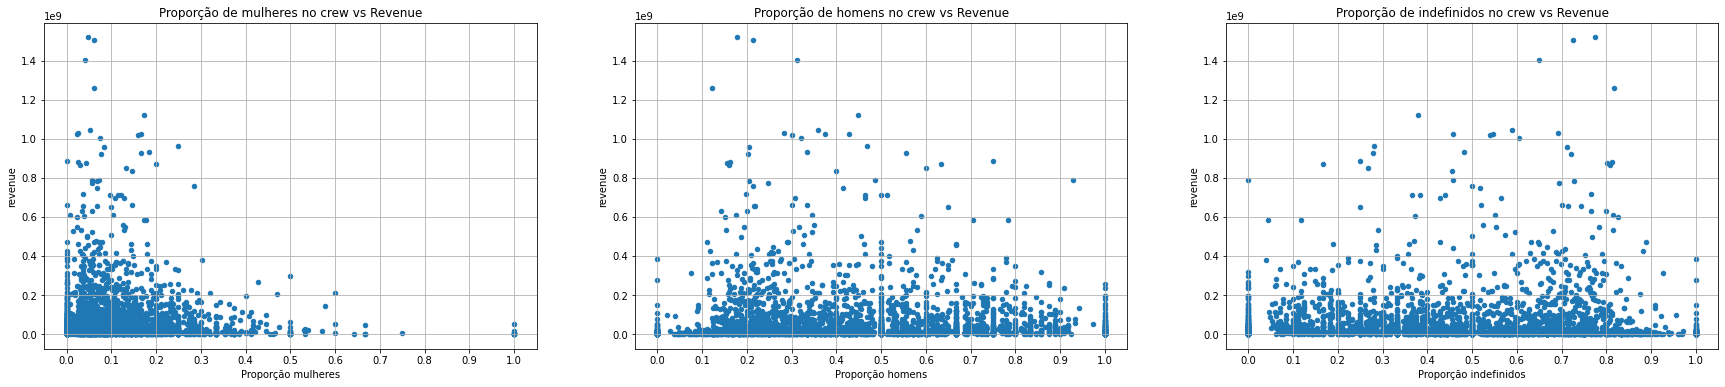

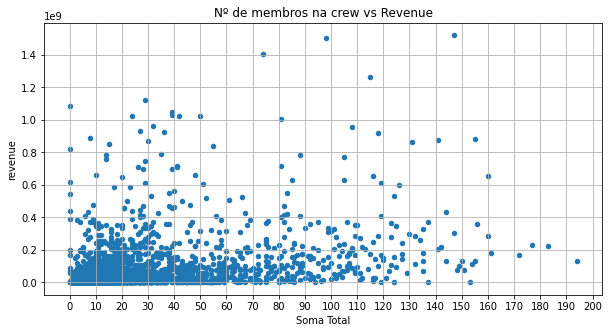

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,6))
crewdata.plot(kind = 'scatter', x = 'Proporção mulheres', y = 'revenue', ax = axs[0], title = 'Proporção de mulheres no crew vs Revenue', xticks=(np.arange(0,1.1,0.1)), grid=True)
crewdata.plot(kind = 'scatter', x = 'Proporção homens', y = 'revenue', ax = axs[1], title = 'Proporção de homens no crew vs Revenue', xticks=(np.arange(0,1.1,0.1)), grid=True)
crewdata.plot(kind = 'scatter', x = 'Proporção indefinidos', y = 'revenue', ax = axs[2], title = 'Proporção de indefinidos no crew vs Revenue', xticks=(np.arange(0,1.1,0.1)), grid=True)
plt.show()

crewdata.plot(kind = 'scatter', x = 'Soma Total', y = 'revenue', title = 'Nº de membros na crew vs Revenue', figsize=(10,5), xticks=(np.arange(0,210,10)), grid=True)
plt.show()

In [80]:
crewexp = crewdata.explode('name')
crew_exp_mean = crewexp.groupby('name')['revenue'].mean()
crew_exp_count = crewexp.groupby('name')['revenue'].count()

crew_mean_frame = crew_exp_mean.to_frame()
crew_mean_final = crew_mean_frame.reset_index()
crew_count_frame = crew_exp_count.to_frame()
crew_count_final = crew_count_frame.reset_index()

#print(crew_mean_final) #Revenue por ator
#print(crew_count_final) #Contagem de filmes por ator 

crewm_data = pd.concat([crew_mean_final['name'], crew_mean_final['revenue'], crew_count_final['revenue']], axis=1, keys=['nome', 'revenue médio', 'nº filmes'])
crewm_data

,nome,revenue médio,nº filmes
0,\tCheung Chi-Sing,194720.0,1
1,\tMak Tin-Shu,129115.0,1
2,'Chema' Hernandez,638641.0,1
3,50 Cent,3812568.5,2
4,A L Katz,5600000.0,1
...,...,...,...
38550,√ñmer √ñzg√ºr,149521495.0,1
38551,√ñzg√ºr Eken,17804565.0,1
38552,≈Åukasz ≈ªal,15298355.0,1
38553,≈ûafak Binay,232324128.0,1


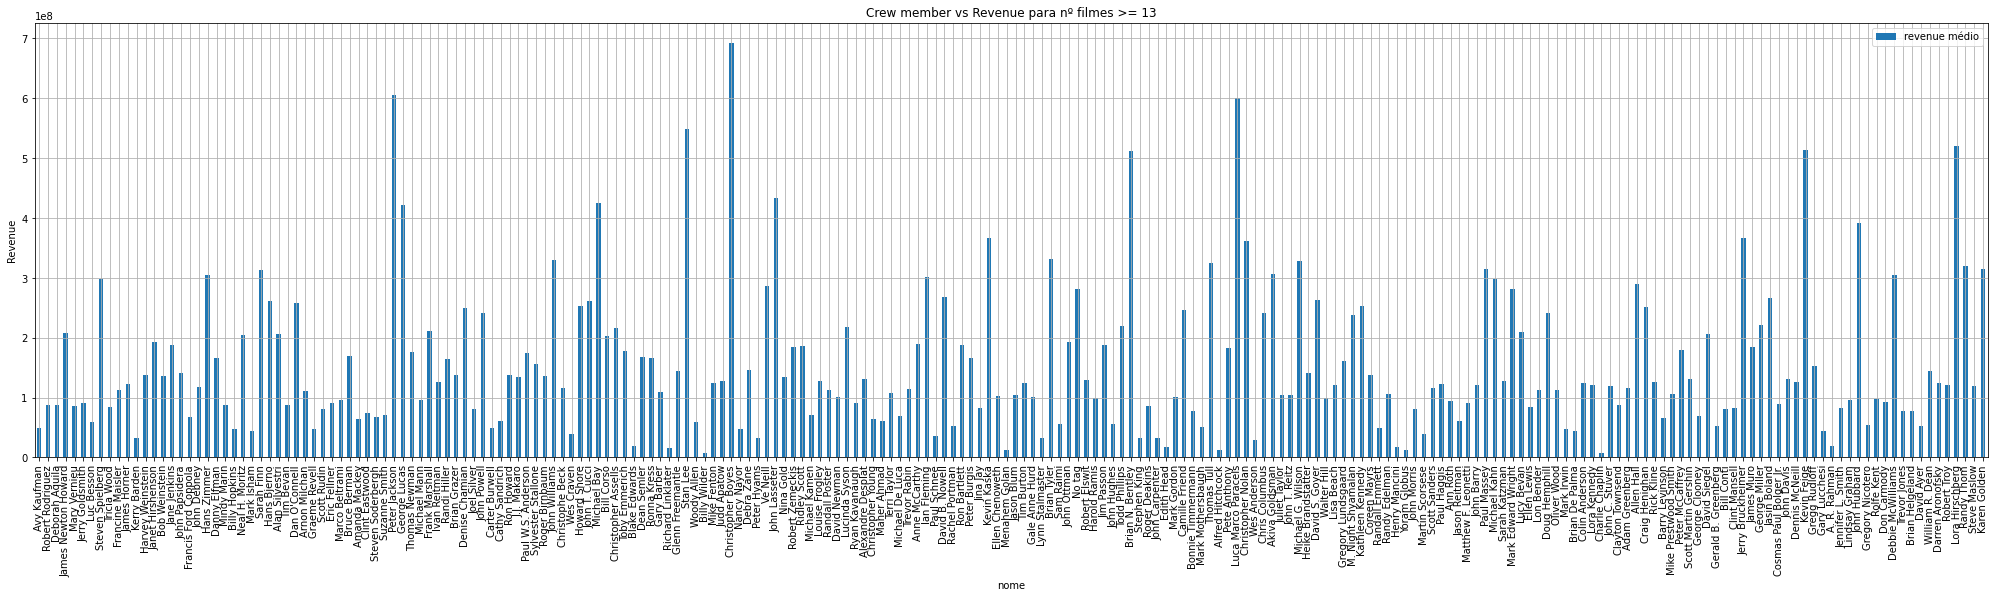

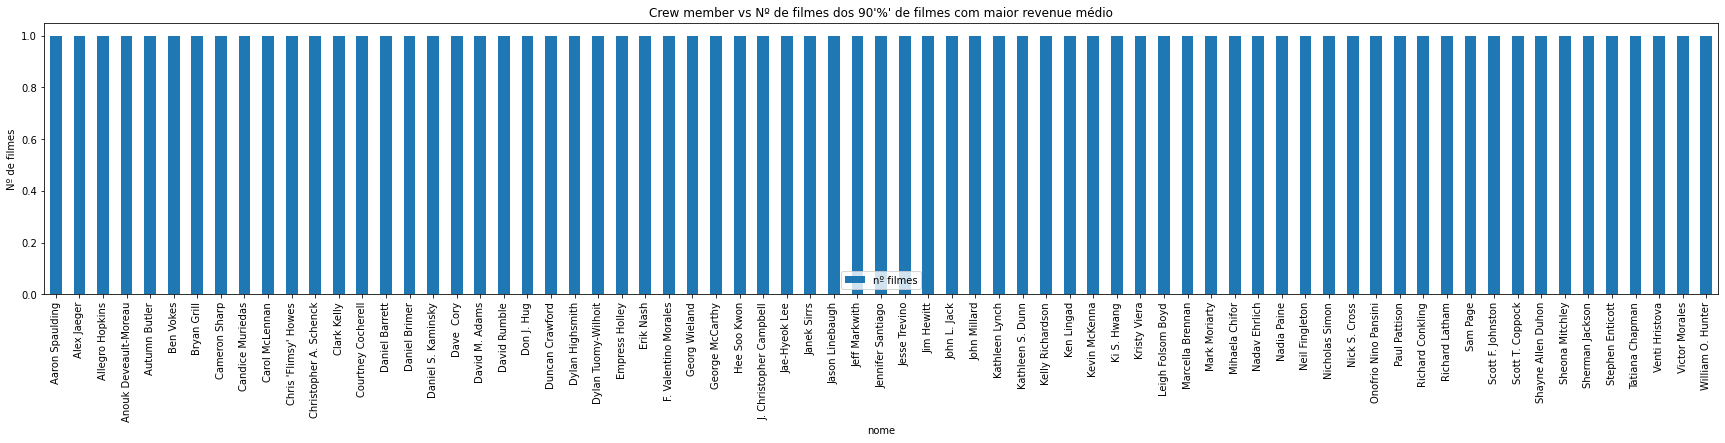

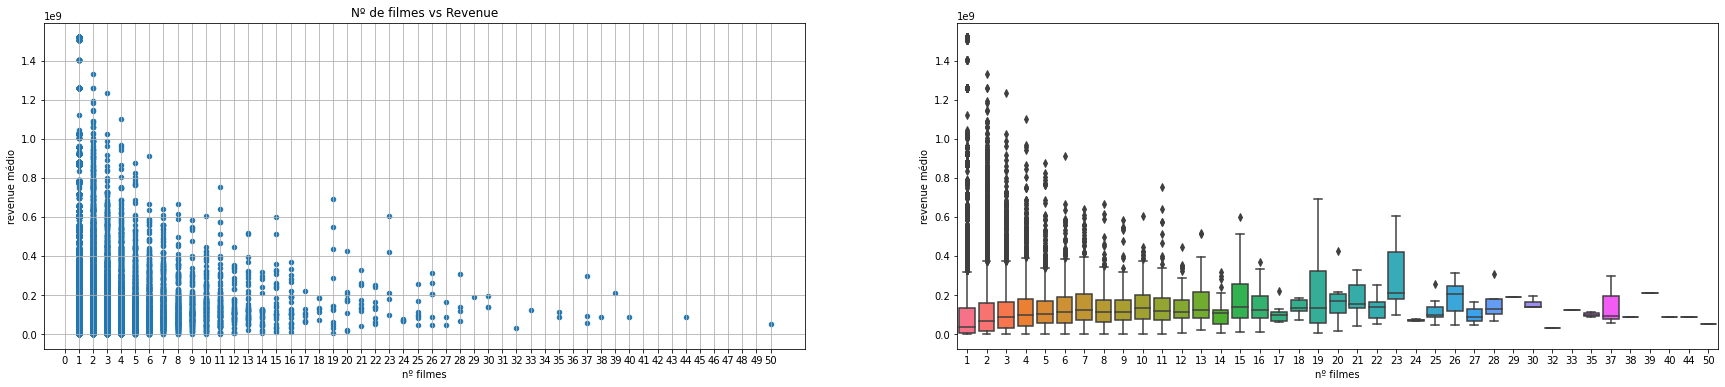

In [81]:
crewm_data_nome_filme = crewm_data.sort_values(by="nº filmes", ascending=False)

crewm_data_nome_filme.loc[crewm_data['nº filmes'] >= 13].plot(kind = 'bar', x = 'nome', y = 'revenue médio', title = 'Crew member vs Revenue para nº filmes >= 13', figsize=(35,8))
plt.xticks(rotation = 90)
plt.ylabel('Revenue')
plt.grid()
plt.show()
crewm_data.loc[crewm_data['revenue médio'] >= max(crewm_data['revenue médio'])*0.90].plot(kind = 'bar', x = 'nome', y = 'nº filmes', title = "Crew member vs Nº de filmes dos 90'%' de filmes com maior revenue médio", figsize=(30,5))
plt.ylabel('Nº de filmes')
plt.xticks(rotation = 90)
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30,6))
crewm_data.plot(kind = 'scatter', x = 'nº filmes', y = 'revenue médio', title = 'Nº de filmes vs Revenue',  ax=axs[0], xticks = np.arange(0, max(crewm_data['nº filmes'])+1, 1), grid = True)
plt.subplot(122)
sns.boxplot(x=crewm_data['nº filmes'], y=crewm_data['revenue médio'], palette="husl", saturation=1)
#plt.title('Nº de filmes vs Revenue')
plt.show()

##### **Normalização dos dados**

In [82]:
crewteste = pd.concat([dados_teste['crew'],dados_teste['crew']])

In [83]:
crewdata_teste = pd.concat([dados_teste['crew'], dados_teste['crew'], dados_teste['crew'], dados_teste['crew']], axis=1, keys=['genero', 'nome', 'credit_id', 'job'])

crewdata_teste['nome'] = crewdata_teste['nome'].fillna('NaN')
crewdata_teste['nome'] = crewdata_teste['nome'].apply(text_to_value, obj='name')
crewdata_teste['nome'] = crewdata_teste['nome'].str.split(';')

crewdata_teste['genero'] = crewdata_teste['genero'].fillna('NaN')
crewdata_teste['genero'] = crewdata_teste['genero'].apply(text_to_value, obj='gender')
crewdata_teste['genero'] = crewdata_teste['genero'].str.split(';')

crewdata_teste['credit_id'] = crewdata_teste['credit_id'].fillna('NaN')
crewdata_teste['credit_id'] = crewdata_teste['credit_id'].apply(text_to_value, obj='credit_id')
crewdata_teste['credit_id'] = crewdata_teste['credit_id'].str.split(';')

crewdata_teste['job'] = crewdata_teste['job'].fillna('NaN')
crewdata_teste['job'] = crewdata_teste['job'].apply(text_to_value, obj='job')
crewdata_teste['job'] = crewdata_teste['job'].str.split(';')

In [84]:
crewdata_teste.head()

,genero,nome,credit_id,job
id,,,,
3001,"[0, 2]","[Kunihiko Yuyama, Hideki Sonoda]","[52fe44e7c3a368484e03d683, 52fe44e7c3a368484e0...","[Director, Writer]"
3002,"[2, 2, 2, 0, 2, 2, 2, 0]","[Edward Mann, Jacques R. Marquette, Jacques R....","[55807805c3a3685b1300060b, 558077f392514127100...","[Editor, Director of Photography, Executive Pr..."
3003,"[0, 0, 2, 1, 2, 1, 0, 0, 0, 2]","[Griffin Dunne, Robert F. Newmyer, Jeffrey Sil...","[52fe4330c3a36847f8041367, 52fe4330c3a36847f80...","[Director, Producer, Producer, Original Music ..."
3004,"[2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, ...","[Louis Craig, Lucie Robitaille, Gilles Sacuto,...","[56478092c3a36826140043af, 5648ca1bc3a36826200...","[Special Effects Supervisor, Casting, Co-Produ..."
3005,"[2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0]","[Brian Grazer, Kim Roth, Ron Howard, Fenton Ba...","[52fe44ce9251416c75041967, 52fe44ce9251416c750...","[Producer, Executive Producer, Producer, Scree..."


In [85]:
crew_exp_treino = crewdata.explode('name')
crew_exp_teste = crewdata_teste.explode('nome')

crew_exp_count_treino = crew_exp_treino.groupby('name')['credit_id'].count()
crew_exp_count_teste = crew_exp_teste.groupby('nome')['credit_id'].count()

crew_count_frame_treino = crew_exp_count_treino.to_frame()
crew_count_final_treino = crew_count_frame_treino.reset_index()
crew_count_frame_teste = crew_exp_count_teste.to_frame()
crew_count_final_teste = crew_count_frame_teste.reset_index()
crew_count_final_treino = crew_count_final_treino.values.tolist()
crew_count_final_teste = crew_count_final_teste.values.tolist()
crew_contagem_nomes = crew_count_final_treino + crew_count_final_teste
data_frame_crew_contagem = pd.DataFrame(crew_contagem_nomes, columns = ['nome', 'nº filmes'])

data_frame_crew_contagem_final = data_frame_crew_contagem.groupby('nome')['nº filmes'].sum()
data_frame_crew_contagem_final.head()
dict_crew_contagem_nfilme = data_frame_crew_contagem_final.to_dict()

### **2.8 Homepage** <a class="anchor" id="section_2_8"></a>

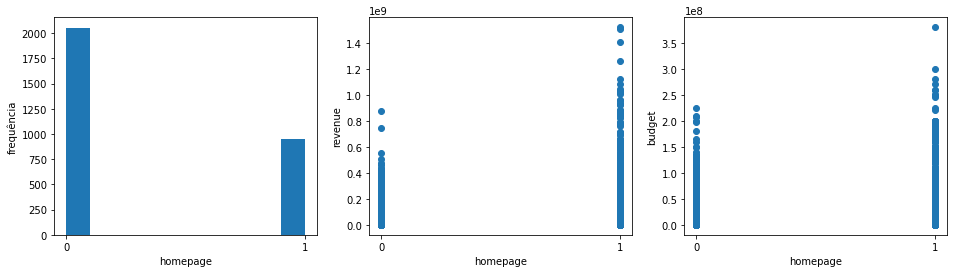

In [79]:
homepagedata = dados_treino.homepage.fillna(0) #replace NaN's with 0
homepagedata = homepagedata.astype(bool) #transform into boolean, string = True, 0 = False
homepagedata = homepagedata.astype(int) #transform into integer

plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.hist(homepagedata)
plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel('homepage')
plt.ylabel('frequência')
plt.subplot(1, 3, 2)
plt.scatter(homepagedata, dados_treino.revenue)
plt.xlabel('homepage')
plt.ylabel('revenue')
plt.locator_params(axis="both", integer=True, tight=True)
plt.subplot(1, 3, 3)
plt.scatter(homepagedata, dados_treino.budget)
plt.xlabel('homepage')
plt.ylabel('budget')
plt.locator_params(axis="both", integer=True, tight=True)
plt.show()

A partir dos dados é possível verificar que menos de um terço dos filmes possuem informação relacionada com a *homepage*. Quando comparado com a *revenue* verifica-se que é mais frequente filmes com *homepage*  resultarem em revenues mais altas. Foi então feita também a comparação com o *budget* e verificada a correlação entre as duas variáveis. Como não exisitem filmes suficientes com *homepage* e existem uma forte correlação entre o *budget* e a *homepage*, esta variavél pode ser retirada.

### **2.9 Popularity** <a class="anchor" id="section_2_9"></a>

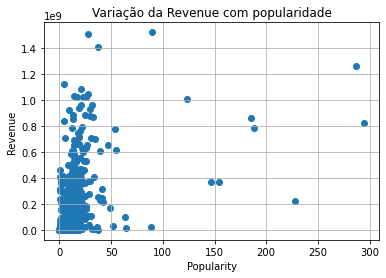

In [80]:
popularitydata = dados_treino.popularity
plt.grid()
plt.scatter(popularitydata, dados_treino.revenue)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Variação da Revenue com popularidade')
plt.show()

**Normalização dos dados de treino**

In [81]:
popularity_treino_norm = funcao_normaliza(dados_treino['popularity'])

dados_treino_norm['popularity'] = popularity_treino_norm

**Normalização dos dados de teste**

In [82]:
popularity_teste_norm = funcao_normaliza(dados_teste['popularity'])

dados_teste_norm['popularity'] = popularity_teste_norm

### **2.10 Genres** <a class="anchor" id="section_2_10"></a>

In [83]:
genredata = pd.concat([dados_treino['genres'],dados_treino['revenue']], axis=1, keys=['genre', 'revenue'])

genredata['genre'] = genredata['genre'].fillna('NaN')
genredata['genre'] = genredata['genre'].apply(text_to_value, obj='name')
genredata['genre'] = genredata['genre'].str.split(';')
genredata.head()

,genre,revenue
id,,
1,[Comedy],12314651
2,"[Comedy, Drama, Family, Romance]",95149435
3,[Drama],13092000
4,"[Thriller, Drama]",16000000
5,"[Action, Thriller]",3923970


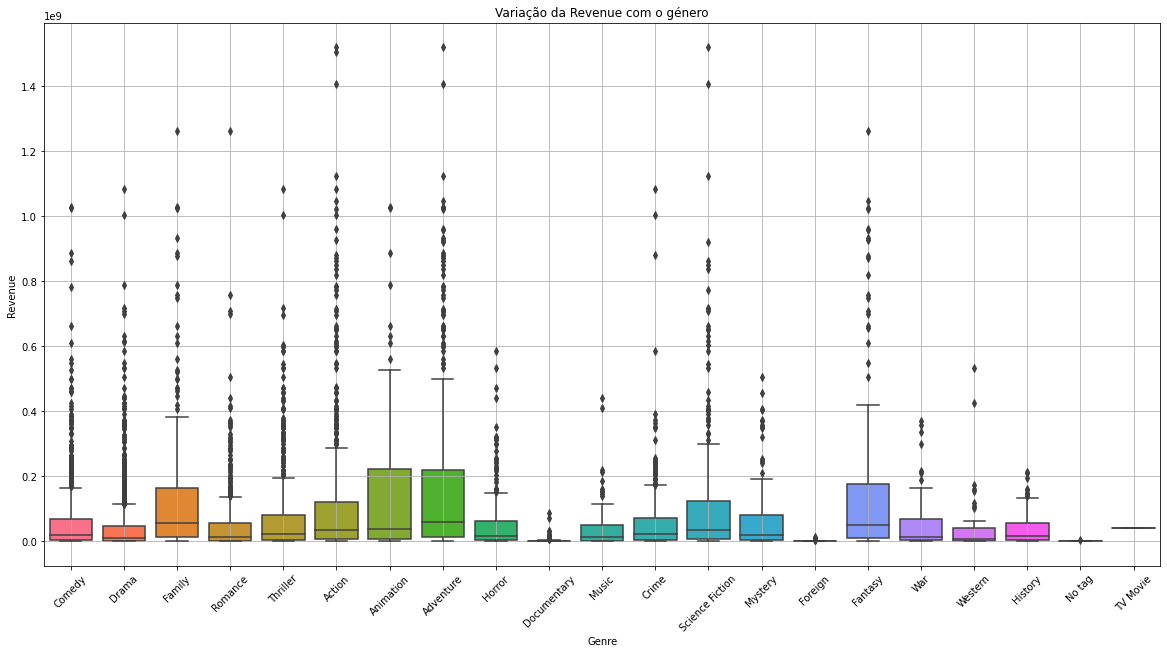

In [84]:
genredata2 = genredata.explode('genre')
plt.figure(figsize=(20,10))
sns.boxplot(x='genre', y='revenue',palette="husl", data=genredata2,saturation=1) #,flierprops=flierprops)
plt.xticks(rotation=0)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.title('Variação da Revenue com o género')
plt.grid()
plt.show()

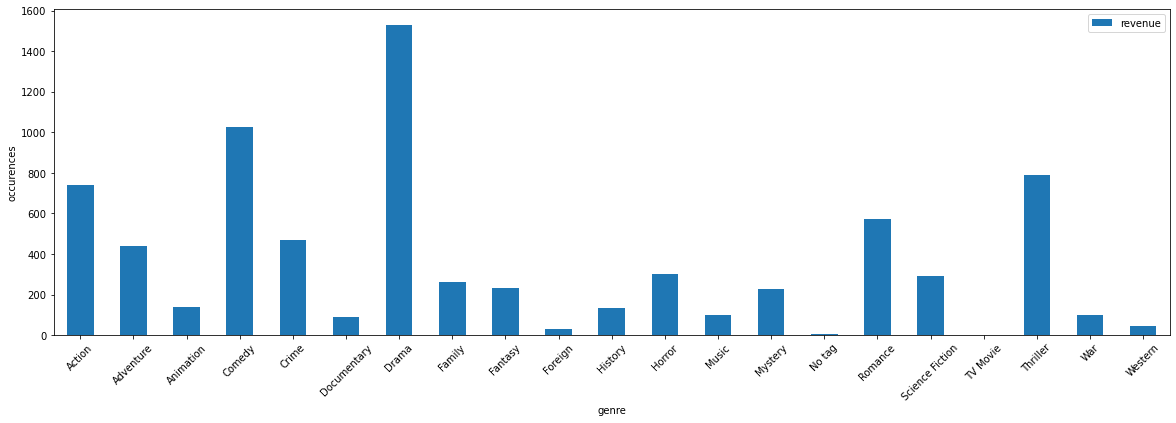

In [85]:
genrecounts = genredata2.groupby('genre').count()
genrecounts.plot(kind='bar', ylabel='occurences',xlabel='genre', figsize=(20, 6))
plt.xticks(rotation=45)
plt.show()

In [86]:
Gcount = genredata['genre']
mais1 = []
unico = []
numero_generos=[]
legenda_generos = []

for j in Gcount:
    if len(j)!=1:
        mais1.append(j) 
        unico.append('-')
        numero_generos.append(len(j))
        for i in range(len(j)):
            legenda_generos.append(j[i])

    else:
        legenda_generos.append(j[0])
        unico.append(j)
        mais1.append('-')
        numero_generos.append(1)

genredata['unico'] = unico
genredata['+1genero'] = mais1
genredata['numero_generos'] = numero_generos

legenda_finalg = []
while len(legenda_generos) != 0:
    for leg_c in legenda_generos:
        legenda_finalg.append(leg_c)
        try:
            while True:
                legenda_generos.remove(leg_c)
        except ValueError:
            pass

In [87]:
dict_generos, mais_generos = fazer_dicionario(genredata['+1genero'], 2, 22)

for num, val in enumerate(legenda_finalg):
    dict_generos['{}'.format(val)] = num+1

dict_generos['No tag'] = 0
dict_generos['-'] = 0
#print(dict_countries)

numv1 = []
for item in mais_generos:
    numv1.append(dict_generos[str(item)])
genredata['numb_+1generos_2'] = numv1
genredata['numb_unico'] = [dict_generos[item[0]] for item in genredata['unico']]

_, novo_generos = fazer_dicionario(genredata['genre'], 2)

num_novo = []
for iom in novo_generos:
    if len(iom) > 1:
        num_novo.append(dict_generos[str(iom)])
    else:
        num_novo.append(dict_generos[iom[0]])
genredata['numb_final'] = num_novo

In [88]:
genredata.head()

,genre,revenue,unico,+1genero,numero_generos,numb_+1generos_2,numb_unico,numb_final
id,,,,,,,,
1,[Comedy],12314651,[Comedy],-,1,0,1,1
2,"[Comedy, Drama, Family, Romance]",95149435,-,"[Comedy, Drama, Family, Romance]",4,22,0,22
3,[Drama],13092000,[Drama],-,1,0,3,3
4,"[Thriller, Drama]",16000000,-,"[Thriller, Drama]",2,23,0,23
5,"[Action, Thriller]",3923970,-,"[Action, Thriller]",2,24,0,24


#### **Normalização de dados**

In [89]:
## DADOS DE TESTE ##
genredata_teste = pd.DataFrame()
genredata_teste['genre'] = dados_teste['genres']

genredata_teste['genre'] = genredata_teste['genre'].fillna('NaN')
genredata_teste['genre'] = genredata_teste['genre'].apply(text_to_value, obj='name')
genredata_teste['genre'] = genredata_teste['genre'].str.split(';')

In [90]:
Gcount_teste = genredata_teste['genre']
mais1_teste = []
unico_teste = []
numero_generos_teste=[]
legenda_generos_teste = []

for j_teste in Gcount_teste:
    if len(j_teste)!=1:
        mais1_teste.append(j_teste) 
        unico_teste.append('-')
        numero_generos_teste.append(len(j_teste))
        for i_teste in range(len(j_teste)):
            legenda_generos.append(j_teste[i_teste])

    else:
        legenda_generos_teste.append(j_teste[0])
        unico_teste.append(j_teste)
        mais1_teste.append('-')
        numero_generos_teste.append(1)

genredata_teste['unico'] = unico_teste
genredata_teste['+1genero'] = mais1_teste
genredata_teste['numero_generos'] = numero_generos_teste

In [91]:
genredata_final = pd.DataFrame()
genredata_final['unico'] = genredata['unico'].to_list() + genredata_teste['unico'].to_list()
genredata_final['+1genero'] = genredata['+1genero'].to_list() + genredata_teste['+1genero'].to_list()
genredata_final['numero_generos'] = genredata['numero_generos'].to_list() + genredata_teste['numero_generos'].to_list()
genredata_final['generos'] = genredata['genre'].to_list() + genredata_teste['genre'].to_list()

In [92]:
dict_genredata_final, array_genredata_final = fazer_dicionario(genredata_final['generos'], 1, 1)
dict_genredata_final["['No tag']"] = 0
dict_genredata_final["-"] = 0

In [93]:
array_genredata_final
array_h = []
array_rt = []
array_p = []

for h in array_genredata_final:
    array_h.append(dict_genredata_final[str(h)])
genredata_final['genero_dict'] = array_h

for rt in genredata_final['unico']:
    array_rt.append(dict_genredata_final[str(rt)])

_, array_mais1_org = fazer_dicionario(genredata_final['+1genero'], 1)
for p in array_mais1_org:
    array_p.append(dict_genredata_final[str(p)])

genredata_final['unico_dict'] = array_rt
genredata_final['mais1_dict'] = array_p

In [94]:
genredata_final.head()

,unico,+1genero,numero_generos,generos,genero_dict,unico_dict,mais1_dict
0,[Comedy],-,1,[Comedy],1,1,0
1,-,"[Comedy, Drama, Family, Romance]",4,"[Comedy, Drama, Family, Romance]",2,0,2
2,[Drama],-,1,[Drama],3,3,0
3,-,"[Thriller, Drama]",2,"[Thriller, Drama]",4,0,4
4,-,"[Action, Thriller]",2,"[Action, Thriller]",5,0,5


In [95]:
genre_norm_final = funcao_normaliza(genredata_final['genero_dict'])
genre_unico_norm_final = funcao_normaliza(genredata_final['unico_dict'])
genre_mais1_norm_final = funcao_normaliza(genredata_final['mais1_dict'])
numero_genre_norm_final = funcao_normaliza(genredata_final['numero_generos'])

genredata_final['generos'] = genre_norm_final
genredata_final['generos_so_1'] = genre_unico_norm_final 
genredata_final['genero_mais_1'] = genre_mais1_norm_final
genredata_final['numero_genero'] = numero_genre_norm_final

##### Normalização dos dados de treino

In [96]:
dados_treino_norm['generos'] = genredata_final['generos'][:3000].to_list()
dados_treino_norm['generos_so_1'] = genredata_final['generos_so_1'][:3000].to_list()
dados_treino_norm['generos_mais_1'] = genredata_final['genero_mais_1'][:3000].to_list()
dados_treino_norm['numero_generos'] = genredata_final['numero_genero'][:3000].to_list()

##### Normalização dos dados de teste

In [97]:
dados_teste_norm['generos'] = genredata_final['generos'][3000:].to_list()
dados_teste_norm['generos_so_1'] = genredata_final['generos_so_1'][3000:].to_list()
dados_teste_norm['generos_mais_1'] = genredata_final['genero_mais_1'][3000:].to_list()
dados_teste_norm['numero_generos'] = genredata_final['numero_genero'][3000:].to_list()

### **2.11 Spoken languages** <a class="anchor" id="section_2_11"></a>

In [98]:
spokendata = pd.concat([dados_treino['spoken_languages'],dados_treino['revenue']], axis=1, keys=['spoken', 'revenue'])

spokendata['spoken'] = spokendata['spoken'].fillna('NaN')
spokendata['spoken'] = spokendata['spoken'].apply(text_to_value, obj='iso_639_1')
spokendata['spoken'] = spokendata['spoken'].str.split(';')
spokendata['spoken'] = spokendata['spoken'].replace('cn','zh')#ambos os códigos indicam língua chinesa
spokendata.head()

,spoken,revenue
id,,
1,[en],12314651
2,[en],95149435
3,[en],13092000
4,"[en, hi]",16000000
5,[ko],3923970


In [99]:
spokendata2 = spokendata.explode('spoken')
print(spokendata2.groupby('spoken')['revenue'].sum())

spoken
No tag     146970858
af         594065697
am             49667
ar        4074223928
bg         220292641
             ...    
xh         210819611
xx          15644012
yi         600860823
zh        6937053763
zu         215111576
Name: revenue, Length: 80, dtype: int64


Por existir um grande número de línguas, vamos limitar às 20 mais significativas.

In [100]:
spokenlang = spokendata2.groupby('spoken')['revenue'].sum()
spokenlang = spokenlang.sort_values(ascending=False)
print(spokenlang[:20])

spoken
en    193309441545
fr     20001496038
es     18629957697
de     12281431274
it      9532814861
ru      9342921467
zh      6937053763
ja      5717035489
ar      4074223928
la      3764957095
th      2972967742
pt      2665462762
cn      2659121680
sv      2078463502
ko      1996944892
el      1915505894
hi      1444078270
he      1400916971
is       839014383
cs       797947867
Name: revenue, dtype: int64


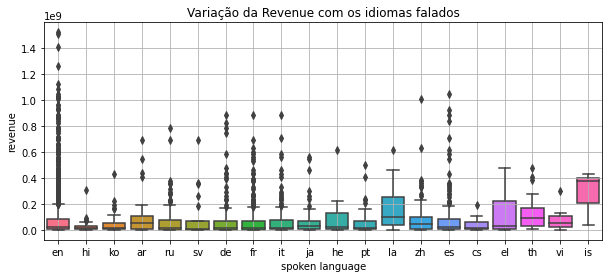

In [101]:
languages = ['en','fr','es','de','it','ru','zh','ja','ar','la','th','pt','sv','ko','el','hi','he','is','cs','vi']
spokendata3 = spokendata2[spokendata2['spoken'].isin(languages)]

#Para facilitar a leitura do gráfico, o código iso-639 é substituido pelo idioma
#spokendata3 = spokendata3.replace(['en','fr','es','de','it','ru','zh','ja','ar','la','th','pt','sv','ko','el','hi','he','is','cs','vi'],['english','french','spanish','german','italian','russian','chinese','japanese','arabic','latin','thai','portuguese','swedish','korean','greek','hindi','hebrew','icelandic','czech','vietnamese'])

plt.figure(figsize=(10,4))
sns.boxplot(x='spoken', y='revenue',palette="husl", data=spokendata3,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('spoken language')
plt.title('Variação da Revenue com os idiomas falados')
plt.grid()
plt.show()

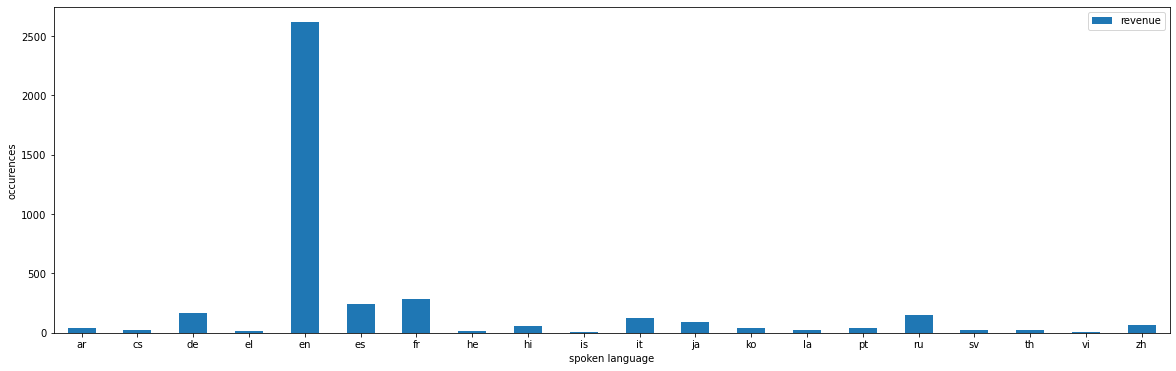

In [102]:
spokenfilms = spokendata3.groupby('spoken').count()
spokenfilms.plot(kind='bar', ylabel='occurences',xlabel='spoken language', figsize=(20, 6))
plt.xticks(rotation=0)
plt.show()

A língua inglesa é a que apresenta valores mais altos de revenue, apesar de possuir uma mediana bastante baixa. Isto deve-se a estar presente num grande número de filmes, o que faz o valor da média ser mais baixo.

In [103]:
Scount = spokendata['spoken']
mais1_idioma = []
unico_idioma = []
numero_idioma=[]
legenda_idioma = []

for j in Scount:
    if len(j)!=1:
        mais1_idioma.append(j) 
        unico_idioma.append('-')
        numero_idioma.append(len(j))
        for i in range(len(j)):
            legenda_idioma.append(j[i])

    else:
        legenda_idioma.append(j[0])
        unico_idioma.append(j)
        mais1_idioma.append('-')
        numero_idioma.append(1)

spokendata['unico'] = unico_idioma
spokendata['+1idioma'] = mais1_idioma
spokendata['numero_idioma'] = numero_idioma

legenda_finals = []
while len(legenda_idioma) != 0:
    for leg_c in legenda_idioma:
        legenda_finals.append(leg_c)
        try:
            while True:
                legenda_idioma.remove(leg_c)
        except ValueError:
            pass

In [104]:
dict_idiomas, mais_idiomas = fazer_dicionario(spokendata['+1idioma'], 2, 81)

for num, val in enumerate(legenda_finals):
    dict_idiomas['{}'.format(val)] = num+1

dict_idiomas['No tag'] = 0
dict_idiomas['-'] = 0

numv1s = []
for item in mais_idiomas:
    numv1s.append(dict_idiomas[str(item)])
spokendata['numb_+1idiomas_2'] = numv1s
spokendata['numb_unico'] = [dict_idiomas[item[0]] for item in spokendata['unico']]

_, novo_idiomas = fazer_dicionario(spokendata['spoken'], 2)

num_novo_idiomas = []
for iom in novo_idiomas:
    if len(iom) > 1:
        num_novo_idiomas.append(dict_idiomas[str(iom)])
    else:
        num_novo_idiomas.append(dict_idiomas[iom[0]])
spokendata['numb_final'] = num_novo_idiomas

In [105]:
spokendata.head()

,spoken,revenue,unico,+1idioma,numero_idioma,numb_+1idiomas_2,numb_unico,numb_final
id,,,,,,,,
1,[en],12314651,[en],-,1,0,1,1
2,[en],95149435,[en],-,1,0,1,1
3,[en],13092000,[en],-,1,0,1,1
4,"[en, hi]",16000000,-,"[en, hi]",2,81,0,81
5,[ko],3923970,[ko],-,1,0,2,2


#### **Normalização de dados**

In [106]:
## DADOS DE TESTE ##
spokendata_teste = pd.DataFrame()
spokendata_teste['spoken'] = dados_teste['spoken_languages']

spokendata_teste['spoken'] = spokendata_teste['spoken'].fillna('NaN')
spokendata_teste['spoken'] = spokendata_teste['spoken'].apply(text_to_value, obj='iso_639_1')
spokendata_teste['spoken'] = spokendata_teste['spoken'].str.split(';')

In [107]:
Scount_teste = spokendata_teste['spoken']
mais1_idioma_teste = []
unico_idioma_teste = []
numero_idiomas_teste=[]
legenda_idiomas_teste = []

for j_teste in Scount_teste:
    if len(j_teste)!=1:
        mais1_idioma_teste.append(j_teste) 
        unico_idioma_teste.append('-')
        numero_idiomas_teste.append(len(j_teste))
        for i_teste in range(len(j_teste)):
            legenda_idiomas_teste.append(j_teste[i_teste])

    else:
        legenda_idiomas_teste.append(j_teste[0])
        unico_idioma_teste.append(j_teste)
        mais1_idioma_teste.append('-')
        numero_idiomas_teste.append(1)

spokendata_teste['unico'] = unico_idioma_teste
spokendata_teste['+1idioma'] = mais1_idioma_teste
spokendata_teste['numero_idiomas'] = numero_idiomas_teste

In [108]:
spokendata_final = pd.DataFrame()
spokendata_final['unico'] = spokendata['unico'].to_list() + spokendata_teste['unico'].to_list()
spokendata_final['+1idioma'] = spokendata['+1idioma'].to_list() + spokendata_teste['+1idioma'].to_list()
spokendata_final['numero_idiomas'] = spokendata['numero_idioma'].to_list() + spokendata_teste['numero_idiomas'].to_list()
spokendata_final['idiomas'] = spokendata['spoken'].to_list() + spokendata_teste['spoken'].to_list()

In [109]:
dict_spokendata_final, array_spokendata_final = fazer_dicionario(spokendata_final['idiomas'], 1, 1)
dict_spokendata_final["['No tag']"] = 0
dict_spokendata_final["-"] = 0

In [110]:
array_spokendata_final
array_hs = []
array_rts = []
array_ps = []

for h in array_spokendata_final:
    array_hs.append(dict_spokendata_final[str(h)])
spokendata_final['idioma_dict'] = array_hs

for rt in spokendata_final['unico']:
    array_rts.append(dict_spokendata_final[str(rt)])

_, array_mais1_orgs = fazer_dicionario(spokendata_final['+1idioma'], 1)
for p in array_mais1_orgs:
    array_ps.append(dict_spokendata_final[str(p)])

spokendata_final['unico_dict'] = array_rts
spokendata_final['mais1_dict'] = array_ps

In [111]:
spokendata_final.head()

,unico,+1idioma,numero_idiomas,idiomas,idioma_dict,unico_dict,mais1_dict
0,[en],-,1,[en],1,1,0
1,[en],-,1,[en],1,1,0
2,[en],-,1,[en],1,1,0
3,-,"[en, hi]",2,"[en, hi]",2,0,2
4,[ko],-,1,[ko],3,3,0


In [112]:
spoken_norm_final = funcao_normaliza(spokendata_final['idioma_dict'])
spoken_unico_norm_final = funcao_normaliza(spokendata_final['unico_dict'])
spoken_mais1_norm_final = funcao_normaliza(spokendata_final['mais1_dict'])
numero_spoken_norm_final = funcao_normaliza(spokendata_final['numero_idiomas'])

spokendata_final['idiomas'] = spoken_norm_final
spokendata_final['idiomas_so_1'] = spoken_unico_norm_final 
spokendata_final['idioma_mais_1'] = spoken_mais1_norm_final
spokendata_final['numero_idiomas'] = numero_spoken_norm_final

##### Normalização dos dados de treino

In [113]:
dados_treino_norm['idiomas'] = spokendata_final['idiomas'][:3000].to_list()
dados_treino_norm['idiomas_so_1'] = spokendata_final['idiomas_so_1'][:3000].to_list()
dados_treino_norm['idioma_mais_1'] = spokendata_final['idioma_mais_1'][:3000].to_list()
dados_treino_norm['numero_idiomas'] = spokendata_final['numero_idiomas'][:3000].to_list()

##### Normalização dos dados de teste

In [114]:
dados_teste_norm['idiomas'] = spokendata_final['idiomas'][3000:].to_list()
dados_teste_norm['idiomas_so_1'] = spokendata_final['idiomas_so_1'][3000:].to_list()
dados_teste_norm['idioma_mais_1'] = spokendata_final['idioma_mais_1'][3000:].to_list()
dados_teste_norm['numero_idiomas'] = spokendata_final['numero_idiomas'][3000:].to_list()

### **2.12 Release date** <a class="anchor" id="section_2_12"></a>

Para comparar as release dates, os dados foram agrupados consoante o dia da semana referente à estreia do filme.

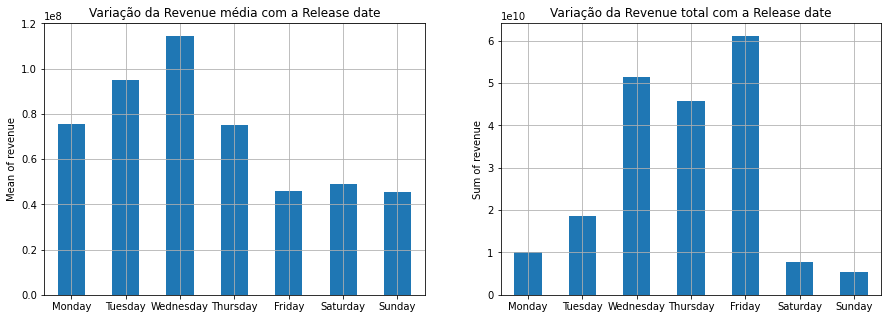

In [115]:
#Convert dates to weekdays
releasedata = pd.to_datetime(dados_treino.release_date, format='%m/%d/%y')#convert to datetime
releasedata_t = pd.to_datetime(dados_teste.release_date, format='%m/%d/%y')
releasedata = releasedata.dt.day_name()
releasedata_t = releasedata_t.dt.day_name()

#Group revenue by weekday
df = pd.concat([releasedata, dados_treino['revenue']], axis=1, keys=['release_date', 'revenue'])
new = df.groupby('release_date')['revenue'].mean() 
new2 = df.groupby('release_date')['revenue'].sum()
new = new.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])
new2 = new2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

#plot
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = new.plot.bar()
plt.ylabel('Mean of revenue')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid()
plt.title('Variação da Revenue média com a Release date')
plt.subplot(1, 2, 2)
ax = new2.plot.bar()
plt.ylabel('Sum of revenue')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid()
plt.title('Variação da Revenue total com a Release date')
plt.show()

**Normalização dos dados de treino**

In [116]:
date_dict_lg, _  = fazer_dicionario(releasedata, 1, 1, 1)
date_novo = []

for rdl in releasedata:
    date_novo.append(date_dict_lg[rdl])

date_norm = funcao_normaliza(date_novo)

dados_treino_norm['release_date'] = date_norm

**Normalização dos dados de teste**

In [117]:
releasedata_t.loc[releasedata_t.isnull()] = 'NaN'
date_dict_lg['NaN'] = 0

date_novo2 = []

for rdl in releasedata_t:
    date_novo2.append(date_dict_lg[rdl])

date_norm2 = funcao_normaliza(date_novo2)

dados_teste_norm['release_date'] = date_norm2

C:\Users\710s-13ikb 224\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  self._setitem_single_block(indexer, value, name)
C:\Users\710s-13ikb 224\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  iloc._setitem_with_indexer(indexer, value, self.name)


### **2.13 Production company** <a class="anchor" id="section_2_13"></a>

In [118]:
procompdata = pd.concat([dados_treino['production_companies'],dados_treino['revenue']], axis=1, keys=['company', 'revenue'])
procompdata['company'] = procompdata['company'].fillna('NaN')
procompdata['company'] = procompdata['company'].apply(text_to_value,obj='name')
procompdata['company'] = procompdata['company'].str.split(';')
procompdata.head()

,company,revenue
id,,
1,"[Paramount Pictures, United Artists, Metro-Gol...",12314651
2,[Walt Disney Pictures],95149435
3,"[Bold Films, Blumhouse Productions, Right of W...",13092000
4,[No tag],16000000
5,[No tag],3923970


In [119]:
procompdata2 = procompdata.explode('company')
print(procompdata2.groupby('company')['revenue'].mean())

company
"DIA" Productions GmbH & Co. KG    44350926.0
1000 Volt                            138730.0
1019 Entertainment                  2801508.0
10th Hole Productions              17414835.0
120 Films                          49100000.0
                                      ...    
Реал-Дакота                         5249225.0
Роскинопрокат                        234748.0
СТВ                                  243000.0
Флагман-Трейд                        234748.0
Фокс                               55635037.0
Name: revenue, Length: 3696, dtype: float64


Por existirem demasiadas companhias de produção serão apenas analisadas as 20 com maior média de *revenue*.

In [120]:
sortprodcomp = procompdata2.groupby('company')['revenue'].sum()
sortprodcomp = sortprodcomp.sort_values(ascending=False)
print(sortprodcomp[:20])

company
Warner Bros.                              24307604057
Universal Pictures                        20618115682
Paramount Pictures                        20090073288
Walt Disney Pictures                      18834179118
Twentieth Century Fox Film Corporation    15726744362
Columbia Pictures                         10945881977
New Line Cinema                           10886938228
Legendary Pictures                         6793731587
Metro-Goldwyn-Mayer (MGM)                  5772602276
Relativity Media                           5344205097
Amblin Entertainment                       5307940236
Marvel Studios                             5292772946
Revolution Sun Studios                     5243755063
Dune Entertainment                         5060991881
DreamWorks SKG                             5051971983
WingNut Films                              5032803816
Village Roadshow Pictures                  5027233732
Touchstone Pictures                        4822432480
Original Film       

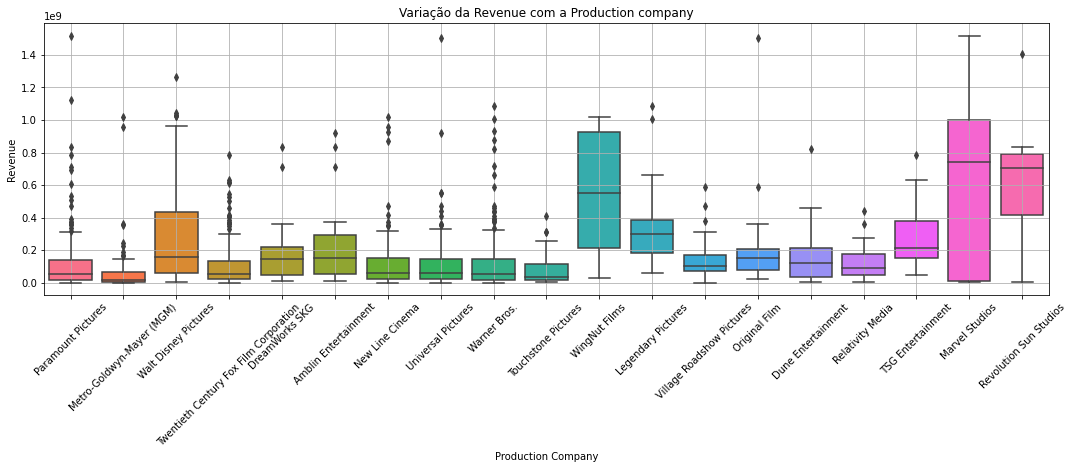

In [121]:
companies = ['Warner Bros.','Universal Pictures','Paramount Pictures','Walt Disney Pictures','Twentieth Century Fox Film Corporation','Columbia Pictures ','New Line Cinema','Legendary Pictures','Metro-Goldwyn-Mayer (MGM)','Relativity Media','Amblin Entertainment','Marvel Studios','Revolution Sun Studios','Dune Entertainment','DreamWorks SKG','WingNut Films','Village Roadshow Pictures','Touchstone Pictures','Original Film','TSG Entertainment']
procompdata2 = procompdata2[procompdata2['company'].isin(companies)]

plt.figure(figsize=(18,5))
sns.boxplot(x='company', y='revenue',palette="husl", data=procompdata2,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Production Company')
plt.ylabel('Revenue')
plt.grid()
plt.title('Variação da Revenue com a Production company')
plt.xticks(rotation=45)
plt.show()

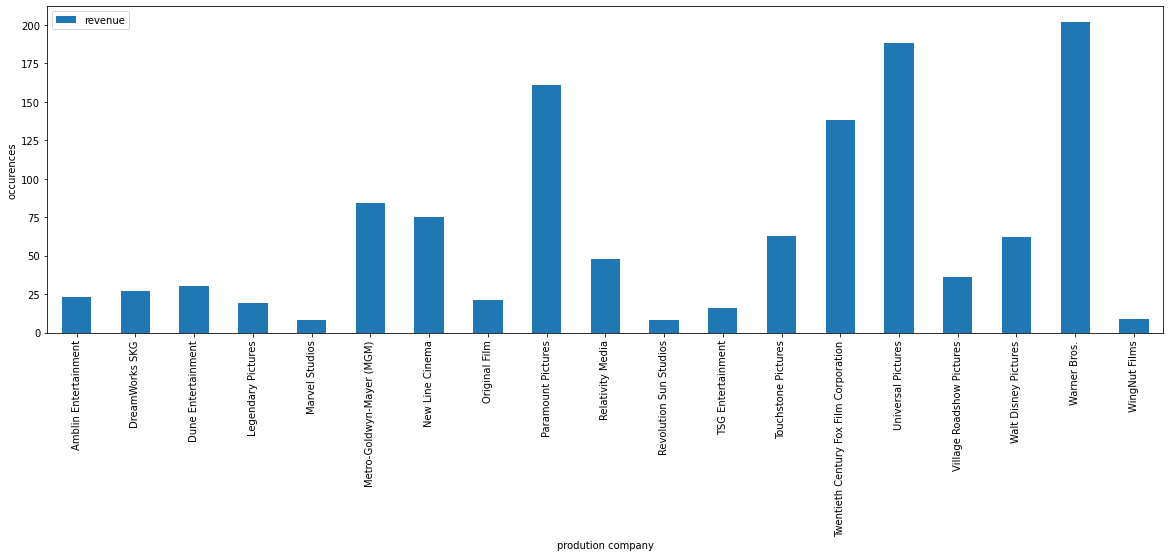

In [122]:
profilms = procompdata2.groupby('company').count()
profilms.plot(kind='bar', ylabel='occurences',xlabel='prodution company', figsize=(20, 6))
plt.xticks(rotation=90)
plt.show()

In [123]:
Ccount = procompdata['company']
mais1_company = []
unico_company = []
numero_companies=[]
legenda_companies = []

for j in Ccount:
    if len(j)!=1:
        mais1_company.append(j) 
        unico_company.append('-')
        numero_companies.append(len(j))
        for i in range(len(j)):
            legenda_companies.append(j[i])

    else:
        legenda_companies.append(j[0])
        unico_company.append(j)
        mais1_company.append('-')
        numero_companies.append(1)

procompdata['unico'] = unico_company
procompdata['+1company'] = mais1_company
procompdata['numero_companies'] = numero_companies

legenda_finalc = []
while len(legenda_companies) != 0:
    for leg_c in legenda_companies:
        legenda_finalc.append(leg_c)
        try:
            while True:
                legenda_companies.remove(leg_c)
        except ValueError:
            pass

In [124]:
dict_companies, mais_companies = fazer_dicionario(procompdata['+1company'], 2, 2406)

for num, val in enumerate(legenda_finalc):
    dict_companies['{}'.format(val)] = num+1

dict_companies['No tag'] = 0
dict_companies['-'] = 0

numv1c = []
for item in mais_companies:
    numv1c.append(dict_companies[str(item)])
procompdata['numb_+1companies_2'] = numv1c
procompdata['numb_unico'] = [dict_companies[item[0]] for item in procompdata['unico']]

_, novo_companies = fazer_dicionario(procompdata['company'], 2)

num_novo_c = []
for iom in novo_companies:
    if len(iom) > 1:
        num_novo_c.append(dict_companies[str(iom)])
    else:
        num_novo_c.append(dict_companies[iom[0]])
procompdata['numb_final'] = num_novo_c

In [125]:
procompdata.head()

,company,revenue,unico,+1company,numero_companies,numb_+1companies_2,numb_unico,numb_final
id,,,,,,,,
1,"[Paramount Pictures, United Artists, Metro-Gol...",12314651,-,"[Paramount Pictures, United Artists, Metro-Gol...",3,2406,0,2406
2,[Walt Disney Pictures],95149435,[Walt Disney Pictures],-,1,0,6,6
3,"[Bold Films, Blumhouse Productions, Right of W...",13092000,-,"[Bold Films, Blumhouse Productions, Right of W...",3,2407,0,2407
4,[No tag],16000000,[No tag],-,1,0,0,0
5,[No tag],3923970,[No tag],-,1,0,0,0


#### **Normalização de dados**

In [126]:
## DADOS DE TESTE ##
procompdata_teste = pd.DataFrame()
procompdata_teste['company'] = dados_teste['production_companies']

procompdata_teste['company'] = procompdata_teste['company'].fillna('NaN')
procompdata_teste['company'] = procompdata_teste['company'].apply(text_to_value, obj='name')
procompdata_teste['company'] = procompdata_teste['company'].str.split(';')

In [127]:
Ccount_teste = procompdata_teste['company']
mais1_comp_teste = []
unico_comp_teste = []
numero_comp_teste=[]
legenda_comp_teste = []

for j_teste in Ccount_teste:
    if len(j_teste)!=1:
        mais1_comp_teste.append(j_teste) 
        unico_comp_teste.append('-')
        numero_comp_teste.append(len(j_teste))
        for i_teste in range(len(j_teste)):
            legenda_comp_teste.append(j_teste[i_teste])

    else:
        legenda_comp_teste.append(j_teste[0])
        unico_comp_teste.append(j_teste)
        mais1_comp_teste.append('-')
        numero_comp_teste.append(1)

procompdata_teste['unico'] = unico_comp_teste
procompdata_teste['+1company'] = mais1_comp_teste
procompdata_teste['numero_companies'] = numero_comp_teste

In [128]:
procompdata_final = pd.DataFrame()
procompdata_final['unico'] = procompdata['unico'].to_list() + procompdata_teste['unico'].to_list()
procompdata_final['+1company'] = procompdata['+1company'].to_list() + procompdata_teste['+1company'].to_list()
procompdata_final['numero_companies'] = procompdata['numero_companies'].to_list() + procompdata_teste['numero_companies'].to_list()
procompdata_final['company'] = procompdata['company'].to_list() + procompdata_teste['company'].to_list()

In [129]:
dict_procompdata_final, array_procompdata_final = fazer_dicionario(procompdata_final['company'], 1, 1)
dict_procompdata_final["['No tag']"] = 0
dict_procompdata_final["-"] = 0

In [130]:
array_procompdata_final
array_hc = []
array_rtc = []
array_pc = []

for h in array_procompdata_final:
    array_hc.append(dict_procompdata_final[str(h)])
procompdata_final['company_dict'] = array_hc

for rt in procompdata_final['unico']:
    array_rtc.append(dict_procompdata_final[str(rt)])

_, array_mais1_orgc = fazer_dicionario(procompdata_final['+1company'], 1)
for p in array_mais1_orgc:
    array_pc.append(dict_procompdata_final[str(p)])

procompdata_final['unico_dict'] = array_rtc
procompdata_final['mais1_dict'] = array_pc

In [131]:
procompdata_final.head()

,unico,+1company,numero_companies,company,company_dict,unico_dict,mais1_dict
0,-,"[Paramount Pictures, United Artists, Metro-Gol...",3,"[Paramount Pictures, United Artists, Metro-Gol...",1,0,1
1,[Walt Disney Pictures],-,1,[Walt Disney Pictures],2,2,0
2,-,"[Bold Films, Blumhouse Productions, Right of W...",3,"[Bold Films, Blumhouse Productions, Right of W...",3,0,3
3,[No tag],-,1,[No tag],0,0,0
4,[No tag],-,1,[No tag],0,0,0


In [132]:
procomp_norm_final = funcao_normaliza(procompdata_final['company_dict'])
procomp_unico_norm_final = funcao_normaliza(procompdata_final['unico_dict'])
procomp_mais1_norm_final = funcao_normaliza(procompdata_final['mais1_dict'])
numero_procomp_norm_final = funcao_normaliza(procompdata_final['numero_companies'])

procompdata_final['company'] = procomp_norm_final
procompdata_final['company_so_1'] = procomp_unico_norm_final 
procompdata_final['company_mais_1'] = procomp_mais1_norm_final
procompdata_final['numero_company'] = numero_procomp_norm_final

##### Normalização dos dados de treino

In [133]:
dados_treino_norm['company'] = procompdata_final['company'][:3000].to_list()
dados_treino_norm['company_so_1'] = procompdata_final['company_so_1'][:3000].to_list()
dados_treino_norm['company_mais_1'] = procompdata_final['company_mais_1'][:3000].to_list()
dados_treino_norm['numero_companies'] = procompdata_final['numero_company'][:3000].to_list()

##### Normalização dos dados de teste

In [134]:
dados_teste_norm['company'] = procompdata_final['company'][3000:].to_list()
dados_teste_norm['company_so_1'] = procompdata_final['company_so_1'][3000:].to_list()
dados_teste_norm['company_mais_1'] = procompdata_final['company_mais_1'][3000:].to_list()
dados_teste_norm['numero_companies'] = procompdata_final['numero_companies'][3000:].to_list()

### **2.14 IMDB id** <a class="anchor" id="section_2_14"></a>

Esta variável refere-se ao identificador do Internet Movie Database (IMDb) e não influencia a *revenue*, pelo que não será utilizado.

### **2.15 Original title** <a class="anchor" id="section_2_15"></a>

O título original do filme não afeta a revenue, pelo que não é considerado para a implementação dos modelos.

### **2.16 Overview** <a class="anchor" id="section_2_16"></a>

A variável *overview* corresponde a uma sinopse do filme. Tal como o título, não será considerada.

### **2.17 Poster path** <a class="anchor" id="section_2_17"></a>

Esta variável corresponde a um link que leva à imagem do póster de promoção do filme e não será considerada pa implementação dos modelos.

### **2.18 Status** <a class="anchor" id="section_2_18"></a>

Para a variável *status* existem apenas dois resultados, *Released* e *Rumored*. Para o último, existem apenas 4 filmes  correspondentes, pelo que esta variável não será considerada.

In [135]:
dados_treino.loc[dados_treino['status'].isin(['Rumored'])].head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
610,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,/oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg,...,1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644
1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,/3ypM4bwZTvUfXiKJTs0BaEZuBhe.jpg,...,2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60
1217,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,/pMN14kaump5CrzbSl1C0a2E0M4f.jpg,...,8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,"When fear made her a victim, she turned fear i...",Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091
1619,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,/4j9U7QMT5D5HhUoIsoAI1niVqz8.jpg,...,2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000


### **2.19 Tagline** <a class="anchor" id="section_2_19"></a>

Semelhante ao título original, esta variável não será considerada.

### **2.20 Title** <a class="anchor" id="section_2_20"></a>

Semelhante ao título original, esta variável não será considerada.

### **2.21 Keywords** <a class="anchor" id="section_2_21"></a>

A variável *keywords* corresponde a uma lista de palavras chaves relacionadas com o filme. Serve como descrição e não afeta a *revenue*.

## __3. Tabelas dos dados de treino e de teste normalizados__ <a class="anchor" id="chapter3"></a>

In [136]:
dados_treino_norm

,Proporção Mulheres,Proporção Homens,Proporção Indefinidos,Nº total de atores,ordem_0,n_filmes_por_ator,runtime,prod_countries,prod_countries_so_1,prod_mais_1,...,numero_generos,idiomas,idiomas_so_1,idioma_mais_1,numero_idiomas,release_date,company,company_so_1,company_mais_1,numero_companies
id,,,,,,,,,,,,,,,,,,,,,
1,0.333333,0.416667,0.250000,0.153846,1.0,0.2750,0.275148,0.001855,0.001862,0.00000,...,0.125,0.001642,0.001745,0.000000,0.111111,0.142857,0.000180,0.000000,0.000180,0.115385
2,0.500000,0.500000,0.000000,0.128205,0.5,0.2750,0.334320,0.001855,0.001862,0.00000,...,0.500,0.001642,0.001745,0.000000,0.111111,0.142857,0.000361,0.000361,0.000000,0.038462
3,0.137255,0.254902,0.607843,0.326923,1.0,0.1750,0.310651,0.001855,0.001862,0.00000,...,0.125,0.001642,0.001745,0.000000,0.111111,0.142857,0.000541,0.000000,0.000541,0.115385
4,0.142857,0.285714,0.571429,0.044872,0.5,0.0625,0.360947,0.003711,0.003724,0.00000,...,0.250,0.003284,0.000000,0.003284,0.222222,0.142857,0.000000,0.000000,0.000000,0.038462
5,0.000000,1.000000,0.000000,0.025641,1.0,0.0250,0.349112,0.005566,0.005587,0.00000,...,0.250,0.004926,0.005236,0.000000,0.111111,0.285714,0.000000,0.000000,0.000000,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.200000,0.733333,0.066667,0.096154,1.0,0.2500,0.301775,0.001855,0.001862,0.00000,...,0.250,0.001642,0.001745,0.000000,0.111111,0.142857,0.128811,0.000000,0.128811,0.076923
2997,0.090909,0.090909,0.818182,0.070513,0.0,0.0125,0.301775,0.515770,0.000000,0.51577,...,0.250,0.087028,0.092496,0.000000,0.111111,0.285714,0.429551,0.000000,0.429551,0.076923
2998,0.266667,0.600000,0.133333,0.096154,0.5,0.1500,0.355030,0.001855,0.001862,0.00000,...,0.500,0.001642,0.001745,0.000000,0.111111,0.142857,0.429731,0.000000,0.429731,0.115385


In [144]:
#dados_treino_norm.info()

In [137]:
array_revenue = funcao_normaliza(dados_treino['revenue'])
dados_treino_norm['revenue'] = array_revenue
dados_treino_norm_id = dados_treino_norm.reset_index()
dados_treino_norm_final = dados_treino_norm_id.drop('id', axis= 1)
dados_treino_norm_final

,Proporção Mulheres,Proporção Homens,Proporção Indefinidos,Nº total de atores,ordem_0,n_filmes_por_ator,runtime,prod_countries,prod_countries_so_1,prod_mais_1,...,idiomas,idiomas_so_1,idioma_mais_1,numero_idiomas,release_date,company,company_so_1,company_mais_1,numero_companies,revenue
0,0.333333,0.416667,0.250000,0.153846,1.0,0.2750,0.275148,0.001855,0.001862,0.00000,...,0.001642,0.001745,0.000000,0.111111,0.142857,0.000180,0.000000,0.000180,0.115385,0.008104
1,0.500000,0.500000,0.000000,0.128205,0.5,0.2750,0.334320,0.001855,0.001862,0.00000,...,0.001642,0.001745,0.000000,0.111111,0.142857,0.000361,0.000361,0.000000,0.038462,0.062617
2,0.137255,0.254902,0.607843,0.326923,1.0,0.1750,0.310651,0.001855,0.001862,0.00000,...,0.001642,0.001745,0.000000,0.111111,0.142857,0.000541,0.000000,0.000541,0.115385,0.008616
3,0.142857,0.285714,0.571429,0.044872,0.5,0.0625,0.360947,0.003711,0.003724,0.00000,...,0.003284,0.000000,0.003284,0.222222,0.142857,0.000000,0.000000,0.000000,0.038462,0.010529
4,0.000000,1.000000,0.000000,0.025641,1.0,0.0250,0.349112,0.005566,0.005587,0.00000,...,0.004926,0.005236,0.000000,0.111111,0.285714,0.000000,0.000000,0.000000,0.038462,0.002582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.200000,0.733333,0.066667,0.096154,1.0,0.2500,0.301775,0.001855,0.001862,0.00000,...,0.001642,0.001745,0.000000,0.111111,0.142857,0.128811,0.000000,0.128811,0.076923,0.001051
2996,0.090909,0.090909,0.818182,0.070513,0.0,0.0125,0.301775,0.515770,0.000000,0.51577,...,0.087028,0.092496,0.000000,0.111111,0.285714,0.429551,0.000000,0.429551,0.076923,0.000119
2997,0.266667,0.600000,0.133333,0.096154,0.5,0.1500,0.355030,0.001855,0.001862,0.00000,...,0.001642,0.001745,0.000000,0.111111,0.142857,0.429731,0.000000,0.429731,0.115385,0.058870
2998,0.346154,0.615385,0.038462,0.166667,1.0,0.5750,0.266272,0.001855,0.001862,0.00000,...,0.001642,0.001745,0.000000,0.111111,0.142857,0.429912,0.000000,0.429912,0.076923,0.113167


Correlação entre as variáveis

Text(0.5, 1.0, 'Correlação entre as diversas variáveis')

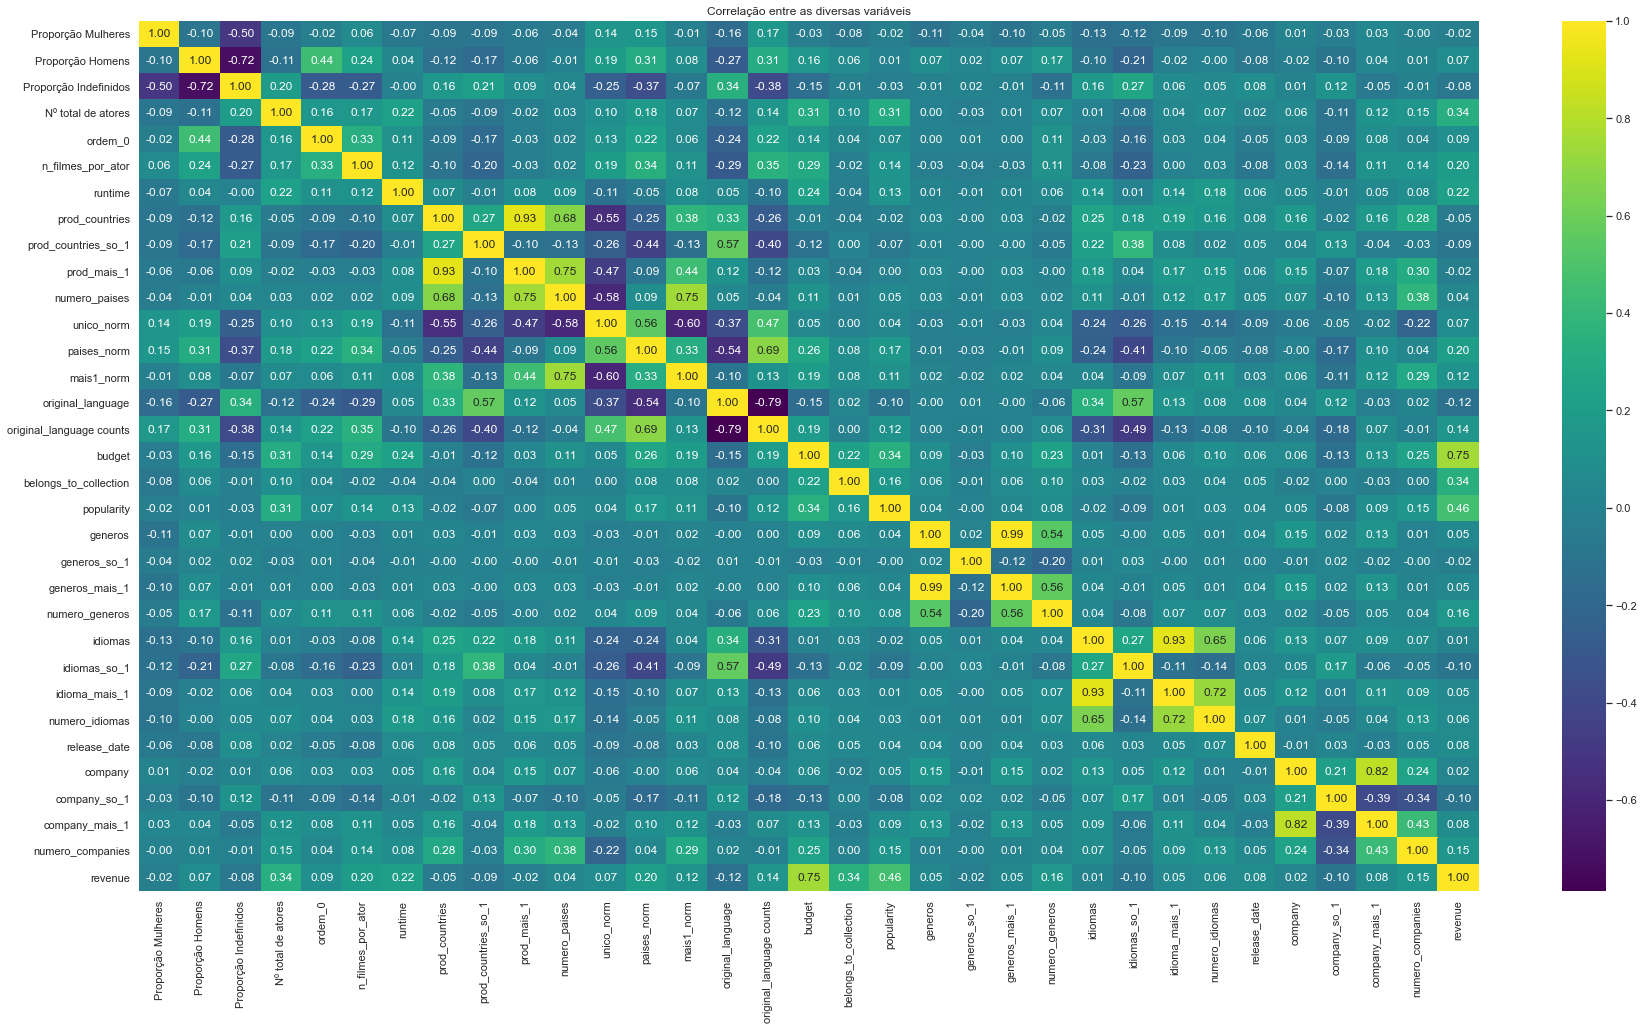

In [138]:
sns.set(rc={'figure.figsize':(30,16)})

corr = dados_treino_norm_final[["Proporção Mulheres", "Proporção Homens", "Proporção Indefinidos", "Nº total de atores", "ordem_0", "n_filmes_por_ator", "runtime", "prod_countries", 
                                "prod_countries_so_1", "prod_mais_1", "numero_paises",  "unico_norm", "paises_norm", "mais1_norm","original_language", "original_language counts", 
                                "budget", "belongs_to_collection", "popularity", "generos", "generos_so_1", "generos_mais_1", "numero_generos", "idiomas", "idiomas_so_1", 
                                "idioma_mais_1", "numero_idiomas", "release_date","company", "company_so_1", "company_mais_1", "numero_companies", "revenue"]].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')

plt.title("Correlação entre as diversas variáveis")

In [139]:
dados_teste_norm

,Proporção Mulheres,Proporção Homens,Proporção Indefinidos,Nº total de atores,ordem_0,n_filmes_por_ator,runtime,prod_countries,prod_countries_so_1,prod_mais_1,...,numero_generos,idiomas,idiomas_so_1,idioma_mais_1,numero_idiomas,release_date,company,company_so_1,company_mais_1,numero_companies
0,0.428571,0.000000,0.571429,0.042424,0.0,0.0250,0.281250,0.020408,0.000000,0.020408,...,0.500,0.016420,0.000000,0.016420,0.222222,0.857143,0.000000,0.000000,0.000000,1
1,0.200000,0.200000,0.600000,0.060606,0.5,0.0125,0.203125,0.001855,0.001862,0.000000,...,0.250,0.001642,0.001745,0.000000,0.111111,0.571429,0.430272,0.430583,0.000000,1
2,0.444444,0.555556,0.000000,0.054545,0.5,0.3000,0.312500,0.001855,0.001862,0.000000,...,0.250,0.001642,0.001745,0.000000,0.111111,0.142857,0.430453,0.000000,0.430453,3
3,0.130435,0.217391,0.652174,0.139394,0.5,0.0500,0.406250,0.124304,0.000000,0.124304,...,0.375,0.121511,0.000000,0.121511,0.333333,0.857143,0.430633,0.000000,0.430633,3
4,0.000000,1.000000,0.000000,0.024242,1.0,0.4625,0.287500,0.001855,0.001862,0.000000,...,0.250,0.001642,0.001745,0.000000,0.111111,0.142857,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.400000,0.600000,0.000000,0.060606,0.5,0.3500,0.368750,0.048237,0.000000,0.048237,...,0.125,1.000000,0.000000,1.000000,0.555556,0.142857,0.999639,0.000000,0.999639,7
4394,0.227273,0.409091,0.363636,0.133333,1.0,0.3375,0.296875,0.001855,0.001862,0.000000,...,0.500,0.001642,0.001745,0.000000,0.111111,0.142857,0.404474,0.000000,0.404474,2
4395,0.235294,0.764706,0.000000,0.103030,1.0,0.2875,0.403125,0.001855,0.001862,0.000000,...,0.125,0.001642,0.001745,0.000000,0.111111,0.428571,0.040592,0.040621,0.000000,1
4396,0.379310,0.206897,0.413793,0.175758,0.5,0.0750,0.312500,0.001855,0.001862,0.000000,...,0.250,0.001642,0.001745,0.000000,0.111111,0.428571,0.999820,0.000000,0.999820,3


In [148]:
#sns.set(rc={'figure.figsize':(30,16)})
#
#corr = dados_teste_norm[["Proporção Mulheres", "Proporção Homens", "Proporção Indefinidos", "Nº total de atores", "ordem_0", "n_filmes_por_ator", "runtime", "prod_countries", 
#                                "prod_countries_so_1", "prod_mais_1", "numero_paises",  "unico_norm", "paises_norm", "mais1_norm","original_language", "original_language counts", 
#                                "budget", "belongs_to_collection", "popularity", "generos", "generos_so_1", "generos_mais_1", "numero_generos", "idiomas", "idiomas_so_1", 
#                                "idioma_mais_1", "numero_idiomas", "release_date","company", "company_so_1", "company_mais_1", "numero_companies"]].corr()
#
#sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')
#
#plt.title("Correlação entre as diversas variáveis")

---
---

## __4. Dados para entrada dos modelos__ <a class="anchor" id="chapter4"></a>

Observando a matriz de correlação entre as diversas variáveis é possível verficar aquelas que mais estão correlacionados com o "Revenue", tendo então sido usadas para o treino do modelo, todas aquelas que apresentam uma correlação positiva.

In [140]:
dados_para_treino = dados_treino_norm_final
dados_para_treino_final = dados_para_treino.drop(["Proporção Mulheres", "Proporção Indefinidos", "prod_countries", "prod_countries_so_1", "prod_mais_1",
                                                  "original_language", "generos_so_1", "idiomas_so_1", "company_so_1"], axis = 1)
dados_para_treino_final

,Proporção Homens,Nº total de atores,ordem_0,n_filmes_por_ator,runtime,numero_paises,paises_norm,unico_norm,mais1_norm,original_language counts,...,generos_mais_1,numero_generos,idiomas,idioma_mais_1,numero_idiomas,release_date,company,company_mais_1,numero_companies,revenue
0,0.416667,0.153846,1.0,0.2750,0.275148,0.083333,0.732143,1.000000,0.000000,1.000000,...,0.000000,0.125,0.001642,0.000000,0.111111,0.142857,0.000180,0.000180,0.115385,0.008104
1,0.500000,0.128205,0.5,0.2750,0.334320,0.083333,0.732143,1.000000,0.000000,1.000000,...,0.002451,0.500,0.001642,0.000000,0.111111,0.142857,0.000361,0.000000,0.038462,0.062617
2,0.254902,0.326923,1.0,0.1750,0.310651,0.083333,0.732143,1.000000,0.000000,1.000000,...,0.000000,0.125,0.001642,0.000000,0.111111,0.142857,0.000541,0.000541,0.115385,0.008616
3,0.285714,0.044872,0.5,0.0625,0.360947,0.083333,0.028676,0.039167,0.000000,0.018580,...,0.004902,0.250,0.003284,0.003284,0.222222,0.142857,0.000000,0.000000,0.038462,0.010529
4,1.000000,0.025641,1.0,0.0250,0.349112,0.083333,0.007560,0.010326,0.000000,0.007715,...,0.006127,0.250,0.004926,0.000000,0.111111,0.285714,0.000000,0.000000,0.038462,0.002582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.733333,0.096154,1.0,0.2500,0.301775,0.083333,0.732143,1.000000,0.000000,1.000000,...,0.018382,0.250,0.001642,0.000000,0.111111,0.142857,0.128811,0.128811,0.076923,0.001051
2996,0.090909,0.070513,0.0,0.0125,0.301775,0.166667,0.011731,0.000000,0.011731,0.003149,...,0.205882,0.250,0.087028,0.000000,0.111111,0.285714,0.429551,0.429551,0.076923,0.000119
2997,0.600000,0.096154,0.5,0.1500,0.355030,0.083333,0.732143,1.000000,0.000000,1.000000,...,0.390931,0.500,0.001642,0.000000,0.111111,0.142857,0.429731,0.429731,0.115385,0.058870
2998,0.615385,0.166667,1.0,0.5750,0.266272,0.083333,0.732143,1.000000,0.000000,1.000000,...,0.018382,0.250,0.001642,0.000000,0.111111,0.142857,0.429912,0.429912,0.076923,0.113167


In [150]:
#dados_para_treino_final.info()

In [141]:
dados_para_treino_final_x_revenue = dados_para_treino_final
dados_para_treino_final_x = dados_para_treino_final_x_revenue.drop('revenue', axis = 1)
dados_para_treino_final_y = dados_para_treino_final_x_revenue['revenue']

In [152]:
#dados_para_treino_final_y

In [153]:
#dados_para_treino_final_x.info()

Como não temos o revenue para os dados de teste, dividimos os dados de treino em dados de treino (50%), dados de validação (30%) e dados de teste (20%), o que prefaz 1500 dados de treino, 900 dados de validação e 600 dados de teste.

In [154]:
#x_treino_modelo_r, x_teste_modelo_r, y_treino_modelo_r, y_teste_modelo_r = train_test_split(dados_para_treino_final_x, dados_para_treino_final_y, 
#                                                                                    test_size=600, train_size=2400)
#
#print(x_treino_modelo_r, '\n', y_treino_modelo_r, '\n',x_teste_modelo_r, '\n', y_teste_modelo_r)

In [142]:
x_treino_modelo = dados_para_treino_final_x[:1500]
y_treino_modelo = dados_para_treino_final_y[:1500]
x_val_modelo = dados_para_treino_final_x[1500:2400]
y_val_modelo = dados_para_treino_final_y[1500:2400]
x_teste_modelo = dados_para_treino_final_x[2400:]
y_teste_modelo = dados_para_treino_final_y[2400:]

#print(x_treino_modelo, '\n', y_treino_modelo, '\n',x_val_modelo, '\n', y_val_modelo, '\n',x_teste_modelo, '\n', y_teste_modelo)

## __5. Modelos__ <a class="anchor" id="chapter5"></a>

In [143]:
def rmsle(y_true, y_pred):
    return 'rmsle', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2)))

Para conseguir perceber a importância das diferentes features na estimação dos valores para os diferentes modelos.

In [144]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

### Regressão linear

In [148]:
regr = LinearRegression()
regr.fit(x_treino_modelo, y_treino_modelo)

LinearRegression()

In [149]:
print("Intercept: ", regr.intercept_)
list(zip(x_treino_modelo, regr.coef_))

Intercept:  -0.008428807868717275


[('Proporção Homens', -0.008784544203583837),
 ('Nº total de atores', 0.04969628568280059),
 ('ordem_0', -0.006698067665965445),
 ('n_filmes_por_ator', -0.003790632645329891),
 ('runtime', 0.048520231187891324),
 ('numero_paises', -0.0044026241395661225),
 ('paises_norm', -0.005141509921421103),
 ('unico_norm', 0.0010142812029274538),
 ('mais1_norm', -0.005884108659278805),
 ('original_language counts', -0.0002113796477285219),
 ('budget', 0.5788668475117875),
 ('belongs_to_collection', 0.03993267388067716),
 ('popularity', 0.5133917089392442),
 ('generos', -0.04168931313550639),
 ('generos_mais_1', -0.001723908004806839),
 ('numero_generos', 0.021808849283938694),
 ('idiomas', -0.01234292079599297),
 ('idioma_mais_1', 0.03627866119077148),
 ('numero_idiomas', -0.05218878833450571),
 ('release_date', 0.006062383096698543),
 ('company', -0.04528015386567392),
 ('company_mais_1', 0.04796378066136435),
 ('numero_companies', -0.07644491980585079)]

In [150]:
pred_regr = regr.predict(x_teste_modelo)

In [151]:
print('MAE:', metrics.mean_absolute_error(y_teste_modelo, pred_regr))
print('MSE:', metrics.mean_squared_error(y_teste_modelo, pred_regr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste_modelo, pred_regr)))
print('RMSLE:', rmsle(y_teste_modelo, pred_regr))
print('R squared:', format(regr.score(x_teste_modelo, y_teste_modelo)*100))

MAE: 0.03168468289850344
MSE: 0.002927489597218466
RMSE: 0.054106280570914
RMSLE: ('rmsle', 0.04499726589603516)
R squared: 62.91069992849002


### Regressão Random Forest

In [152]:
rf = RandomForestRegressor()

rf.fit(x_treino_modelo, y_treino_modelo)
pred_rf_val = rf.predict(x_val_modelo)

In [153]:
print('MAE:', metrics.mean_absolute_error(y_val_modelo, pred_rf_val))
print('MSE:', metrics.mean_squared_error(y_val_modelo, pred_rf_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val_modelo, pred_rf_val)))
print('RMSLE:', rmsle(y_val_modelo, pred_rf_val))
print('R squared:', format(rf.score(x_val_modelo,y_val_modelo)*100))

MAE: 0.028268006703359015
MSE: 0.002779804566460776
RMSE: 0.05272385196911144
RMSLE: ('rmsle', 0.04246121119120109)
R squared: 68.92954668485203


In [154]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10,20,40]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
random_search = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter=30, cv=5, random_state=42)
model_random_search = random_search.fit(x_treino_modelo,y_treino_modelo)
model_random_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 16}

Os parâmetros ótimos serão então utilizados para fazer a regressão:

In [155]:
rf_opt = RandomForestRegressor(n_estimators = 600, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 16)# Train the model on training data
rf_opt.fit(x_treino_modelo, y_treino_modelo)

RandomForestRegressor(max_depth=16, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=600)

In [157]:
pred_rf = rf_opt.predict(x_teste_modelo)

In [158]:
print('MAE:', metrics.mean_absolute_error(y_teste_modelo, pred_rf))
print('MSE:', metrics.mean_squared_error(y_teste_modelo, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste_modelo, pred_rf)))
print('RMSLE:', rmsle(y_teste_modelo, pred_rf))
print('R squared:', format(rf.score(x_teste_modelo,y_teste_modelo)*100))

MAE: 0.029526311514211798
MSE: 0.002679120076858655
RMSE: 0.0517602171253044
RMSLE: ('rmsle', 0.042257053731043326)
R squared: 67.23388996626495


### XGBRegressor

In [159]:
xgbr = XGBRegressor(objective='reg:squarederror')

xgbr.fit(x_treino_modelo, y_treino_modelo)
pred_xgbr_val = xgbr.predict(x_val_modelo)

NameError: name 'XGBRegressor' is not defined

In [169]:
print('MAE:', metrics.mean_absolute_error(y_val_modelo, pred_xgbr_val))
print('MSE:', metrics.mean_squared_error(y_val_modelo, pred_xgbr_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val_modelo, pred_xgbr_val)))
print('RMSLE:', rmsle(y_val_modelo, pred_xgbr_val))
print('R squared:', format(xgbr.score(x_val_modelo,y_val_modelo)*100))

MAE: 0.030200251447520393
MSE: 0.0030797514407758094
RMSE: 0.055495508293697156
RMSLE: ('rmsle', 0.04414105008116756)
R squared: 65.57697813817347


Otimização dos parâmetros

In [170]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] # quantas vezes vai iterar o ciclo = nº de modelos no conjunto de modelos 
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]

# Random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

random_search = RandomizedSearchCV(xgbr, param_distributions=random_grid, n_iter=30, cv=5, random_state=1)
#cv = 5 para fazer o 5-fold cross validation

model_random_search = random_search.fit(x_treino_modelo, y_treino_modelo)
model_random_search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 800}

In [195]:
xgbr_reg_otp = XGBRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 800, objective='reg:squarederror')
model_xgbr_otp = xgbr_reg_otp.fit(x_treino_modelo, y_treino_modelo)
treino_xgbr_prediction = pd.DataFrame({'Previsto': model_xgbr_otp.predict(x_treino_modelo),'Valor Real': y_treino_modelo})

# Erro Treino 
print('Erro treino:', np.sqrt(metrics.mean_squared_error(treino_xgbr_prediction['Previsto'],(treino_xgbr_prediction['Valor Real']))))
valid_xgbr_prediction = pd.DataFrame({'Previsto': model_xgbr_otp.predict(x_val_modelo),'Valor Real': y_val_modelo})

# Error Validação
print('Erro validação:', np.sqrt(metrics.mean_squared_error((valid_xgbr_prediction['Previsto']),(valid_xgbr_prediction['Valor Real']))))

Erro treino: 0.0270601587764
Erro validação: 0.0542505896179916


In [196]:
y_pred_teste_xgbr = model_xgbr_otp.predict(x_teste_modelo)

print('MAE:', metrics.mean_absolute_error(y_teste_modelo, y_pred_teste_xgbr))
print('MSE:', metrics.mean_squared_error(y_teste_modelo, y_pred_teste_xgbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste_modelo, y_pred_teste_xgbr)))
print('RMSLE:', rmsle(y_teste_modelo, y_pred_teste_xgbr))
print('R squared:', format(model_xgbr_otp.score(x_teste_modelo,y_teste_modelo)*100))

MAE: 0.03217748875147647
MSE: 0.0026977514113618044
RMSE: 0.05193988266603809
RMSLE: ('rmsle', 0.04371224260054569)
R squared: 65.82132633044822


In [173]:
importancia_xgbr_reg = rf_feat_importance(xgbr, x_treino_modelo)
#print(importancia_xgbr_reg)

### SVM

In [174]:
svm_model = svm.SVR()   
svm_model.fit(x_treino_modelo, y_treino_modelo)
y_pred_val_svm = svm_model.predict(x_val_modelo)

In [175]:
print('MAE:', metrics.mean_absolute_error(y_val_modelo, y_pred_val_svm))
print('MSE:', metrics.mean_squared_error(y_val_modelo, y_pred_val_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val_modelo, y_pred_val_svm)))
print('RMSLE:', rmsle(y_val_modelo, y_pred_val_svm))
print('R squared:', format(svm_model.score(x_val_modelo,y_val_modelo)*100))

MAE: 0.060076000414256675
MSE: 0.005433070984334147
RMSE: 0.073709368362062
RMSLE: ('rmsle', 0.06524475337035485)
R squared: 39.27343655256884


Otimização dos parâmetros

In [176]:
C_values = [0.1, 0.5, 1, 5, 10, 50, 100]
gamma_values = [0.01, 0.1, 0.3, 1, 3, 10, 30]
kernel_types = ['linear', 'poly', 'rbf']
coef0_parameter = [0.1, 1, 5, 10, 50]
degree = [1, 2, 3, 5, 10]

#Random grid
random_grid = {'kernel': kernel_types,
               'gamma': gamma_values,
               'C': C_values,
               'degree': degree,
               'coef0': coef0_parameter}

random_search = RandomizedSearchCV(svm_model, param_distributions = random_grid, n_iter = 15, cv=5, random_state=42)

model_random_search = random_search.fit(x_treino_modelo, y_treino_modelo)
model_random_search.best_params_

{'C': 1, 'coef0': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}

In [177]:
svm_reg_otp = svm.SVR(kernel = 'linear', C=1, degree=3, coef0=0.1, gamma=0.1)

model_svm_otp = svm_reg_otp.fit(x_treino_modelo, y_treino_modelo)
treino_svm_prediction = pd.DataFrame({'Previsto': model_svm_otp.predict(x_treino_modelo),'Valor Real': y_treino_modelo})

# Erro Treino 
print('Erro treino:', np.sqrt(metrics.mean_squared_error((treino_svm_prediction['Previsto']),(treino_svm_prediction['Valor Real']))))
valid_svm_prediction = pd.DataFrame({'Previsto': model_svm_otp.predict(x_val_modelo),'Valor Real': y_val_modelo})

# Error Validação
print('Erro validação:', np.sqrt(metrics.mean_squared_error((valid_svm_prediction['Previsto']),(valid_svm_prediction['Valor Real']))))

Erro treino: 0.058333409651630606
Erro validação: 0.058086165514052615


In [178]:
y_pred_teste_svm = model_svm_otp.predict(x_teste_modelo)

print('MAE:', metrics.mean_absolute_error(y_teste_modelo, y_pred_teste_svm))
print('MSE:', metrics.mean_squared_error(y_teste_modelo, y_pred_teste_svm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste_modelo, y_pred_teste_svm)))
print('RMSLE:', rmsle(y_teste_modelo, y_pred_teste_svm))
print('R squared:', format(svm_reg_otp.score(x_teste_modelo,y_teste_modelo)*100))

MAE: 0.03737539876407501
MSE: 0.003371385793149842
RMSE: 0.05806363572107625
RMSLE: ('rmsle', 0.0493058410822356)
R squared: 57.28683734426647


### LGBMRegressor

In [179]:
lgbm_reg = LGBMRegressor()

lgbm_reg.fit(x_treino_modelo, y_treino_modelo)
pred_val = lgbm_reg.predict(x_val_modelo)

In [180]:
print('MAE:', metrics.mean_absolute_error(y_val_modelo, pred_val))
print('MSE:', metrics.mean_squared_error(y_val_modelo, pred_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val_modelo, pred_val)))
print('RMSLE:', rmsle(y_val_modelo, pred_val))
print('R squared:', format(rf.score(x_val_modelo,y_val_modelo)*100))

MAE: 0.026749601425499793
MSE: 0.0028438348564673193
RMSE: 0.053327618139828066
RMSLE: ('rmsle', 0.04338610033281354)
R squared: 67.61655091360154


Otimização dos parâmetros

In [181]:
#from lightgbm.callback import early_stopping
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] # quantas vezes vai iterar o ciclo = nº de modelos no conjunto de modelos 
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]

# Random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

random_search = RandomizedSearchCV(lgbm_reg, param_distributions=random_grid, n_iter=30, cv=5, random_state=42)

model_random_search = random_search.fit(x_treino_modelo, y_treino_modelo)
model_random_search.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400}

In [197]:
lgbm_reg_otp = LGBMRegressor(learning_rate = 0.01, max_depth = 6, n_estimators = 400)
model_otp = lgbm_reg_otp.fit(x_treino_modelo, y_treino_modelo)
treino_prediction = pd.DataFrame({'Previsto': model_otp.predict(x_treino_modelo),'Valor Real': y_treino_modelo})

# Erro Treino 
print('Erro treino:', np.sqrt(metrics.mean_squared_error((treino_prediction['Previsto']),(treino_prediction['Valor Real']))))
valid_prediction = pd.DataFrame({'Previsto': model_otp.predict(x_val_modelo),'Valor Real': y_val_modelo})

# Error Validação
print('Erro validação:', np.sqrt(metrics.mean_squared_error((valid_prediction['Previsto']),(valid_prediction['Valor Real']))))

Erro treino: 0.040712141905713574
Erro validação: 0.05133092018959973


In [198]:
y_pred_teste_lgbm = model_otp.predict(x_teste_modelo)

print('MAE:', metrics.mean_absolute_error(y_teste_modelo, y_pred_teste_lgbm))
print('MSE:', metrics.mean_squared_error(y_teste_modelo, y_pred_teste_lgbm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste_modelo, y_pred_teste_lgbm)))
print('RMSLE:', rmsle(y_teste_modelo, y_pred_teste_lgbm))
print('R squared:', format(model_otp.score(x_teste_modelo,y_teste_modelo)*100))

MAE: 0.025779546610563978
MSE: 0.002486428640738312
RMSE: 0.04986410172396884
RMSLE: ('rmsle', 0.040821787036567886)
R squared: 68.4986419591851


In [184]:
importancia_lgbm_reg = rf_feat_importance(lgbm_reg, x_treino_modelo)
#importancia_lgbm_reg

## Conclusão dos modelos

Dos modelos anteriormente analisados é possível verificar que em todos os casos, houve uma melhoria da regressão em relação ao modelo base após otimização.

## __Referências:__
[1] https://www.kaggle.com/nikosraftogiannis/movie-revenue-evaluator

[2] https://rpubs.com/billynguyen/tmdb

[3] https://www.kaggle.com/tavoosi/predicting-box-office-revenue-with-random-forest#last-data-preparations

[4] https://www.kaggle.com/dway88/feature-eng-feature-importance-random-forest
(importance of features)

[5] https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat

[6] https://www.kaggle.com/shahules/eda-feature-engineering-and-keras-model

[7] https://www.kaggle.com/ashishpatel26/now-you-see-me/notebook

[8] https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation

[9] https://www.kaggle.com/praxitelisk/tmdb-box-office-prediction-eda-ml